# B. Analisis Lengkap Dataset Flu

In [1]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving flu.csv to flu.csv


In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import warnings

# Mengabaikan warning
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette('viridis', 10)
sns.set_palette(colors)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 1. Membaca dan Eksplorasi Data Awal

In [3]:
# Membaca dataset flu.csv
df = pd.read_csv('flu.csv')

# Tampilkan info tentang dataset
print(f"Jumlah baris dan kolom: {df.shape}")
print("\n== LIMA DATA PERTAMA ==")
df.head()

Jumlah baris dan kolom: (1482, 20)

== LIMA DATA PERTAMA ==


,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Informasi tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

In [5]:
# Statistik deskriptif untuk kolom numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1454.0,26.471040,21.487982,0.000000,7.000000,24.0000,42.000000,88.000000
neutrophil,103.0,6.854078,12.690131,0.446000,2.160000,3.3100,6.645000,93.000000
serumLevelsOfWhiteBloodCell,151.0,6.885159,4.346668,0.500000,3.995000,5.6900,9.155000,36.070000
lymphocytes,156.0,1.850154,3.956668,0.130000,0.637500,0.9055,1.605000,30.600000
DurationOfIllness,87.0,13.988506,9.043171,1.000000,7.000000,12.0000,20.000000,37.000000
Temperature,628.0,38.068312,1.094468,35.722222,37.222222,38.0000,38.722222,42.222222


Distribusi Diagnosis:
           Jumlah  Persentase (%)
Diagnosis                        
H1N1         1072           72.33
COVID19       410           27.67


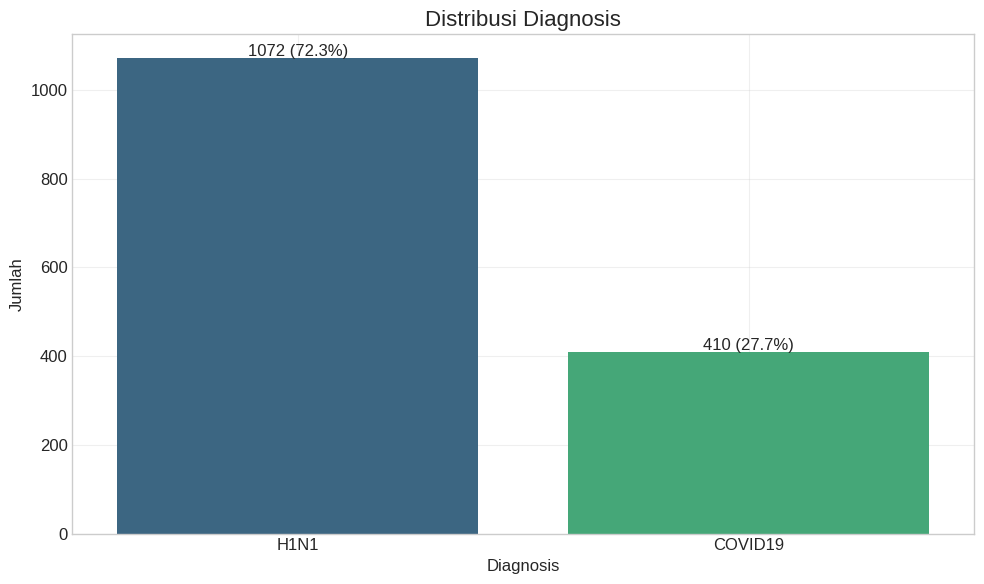

In [6]:
# Memeriksa distribusi variabel target (Diagnosis)
diagnosis_counts = df['Diagnosis'].value_counts()
print("Distribusi Diagnosis:")
diagnosis_distribution = pd.DataFrame({
    'Jumlah': diagnosis_counts,
    'Persentase (%)': (diagnosis_counts / len(df) * 100).round(2)
})
print(diagnosis_distribution)

# Visualisasi distribusi diagnosis
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Diagnosis', data=df, palette='viridis')
plt.title('Distribusi Diagnosis', fontsize=16)
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')

# Menambahkan label nilai di atas bar
for i, v in enumerate(diagnosis_counts):
    ax.text(i, v + 5, f"{v} ({(v/len(df)*100):.1f}%)", ha='center')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Kolom dengan nilai yang hilang:
                             Jumlah nilai hilang  Persentase (%)
ShortnessOfBreath                           1407       94.939271
DurationOfIllness                           1395       94.129555
GroundGlassOpacity                          1389       93.724696
neutrophil                                  1379       93.049933
InitialPCRDiagnosis                         1378       92.982456
CReactiveProteinLevels                      1345       90.755735
serumLevelsOfWhiteBloodCell                 1331       89.811066
lymphocytes                                 1326       89.473684
CTscanResults                               1323       89.271255
RiskFactors                                 1273       85.897436
NauseaVomitting                             1061       71.592443
Diarrhea                                    1032       69.635628
Fatigue                                      951       64.170040
Temperature                                  854       57.

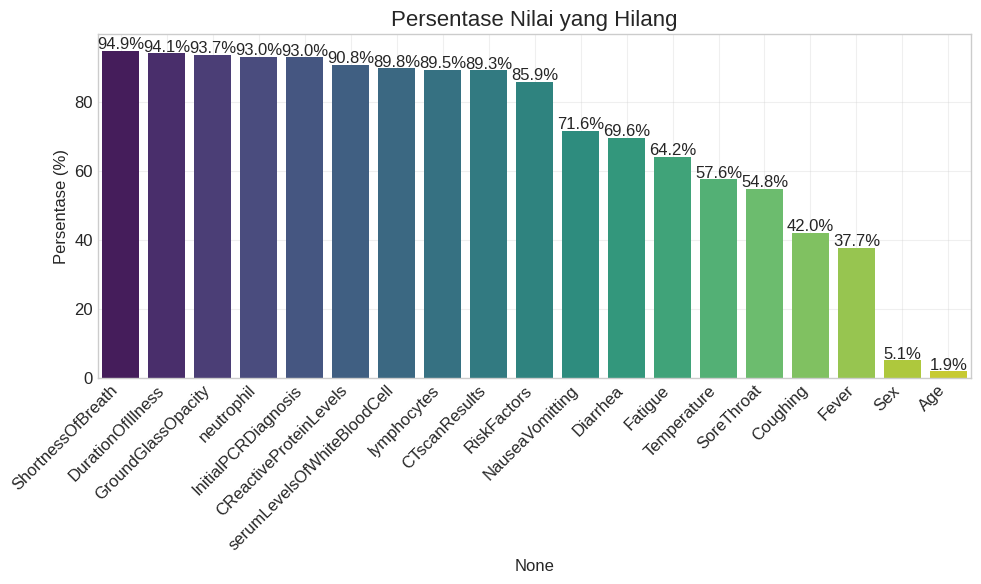

In [7]:
# Memeriksa nilai yang hilang
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Jumlah nilai hilang': missing_values,
    'Persentase (%)': missing_percent
})

# Menampilkan hanya kolom dengan nilai yang hilang
missing_summary = missing_df[missing_df['Jumlah nilai hilang'] > 0].sort_values('Persentase (%)', ascending=False)

if not missing_summary.empty:
    print("Kolom dengan nilai yang hilang:")
    print(missing_summary)

    # Visualisasi nilai yang hilang
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=missing_summary.index, y='Persentase (%)', data=missing_summary, palette='viridis')
    plt.title('Persentase Nilai yang Hilang', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Persentase (%)')
    plt.grid(True, alpha=0.3)

    # Menambahkan label persentase di atas bar
    for i, v in enumerate(missing_summary['Persentase (%)']):
        ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada nilai yang hilang dalam dataset!")

# 2. Visualisasi dan Analisis Data

In [8]:
# Identifikasi kolom kategorik dan numerik
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Kolom kategorik: {categorical_columns}")
print(f"Kolom numerik: {numeric_columns}")

Kolom kategorik: ['Diagnosis', 'InitialPCRDiagnosis', 'Sex', 'CReactiveProteinLevels', 'CTscanResults', 'RiskFactors', 'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue']
Kolom numerik: ['Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'DurationOfIllness', 'Temperature']


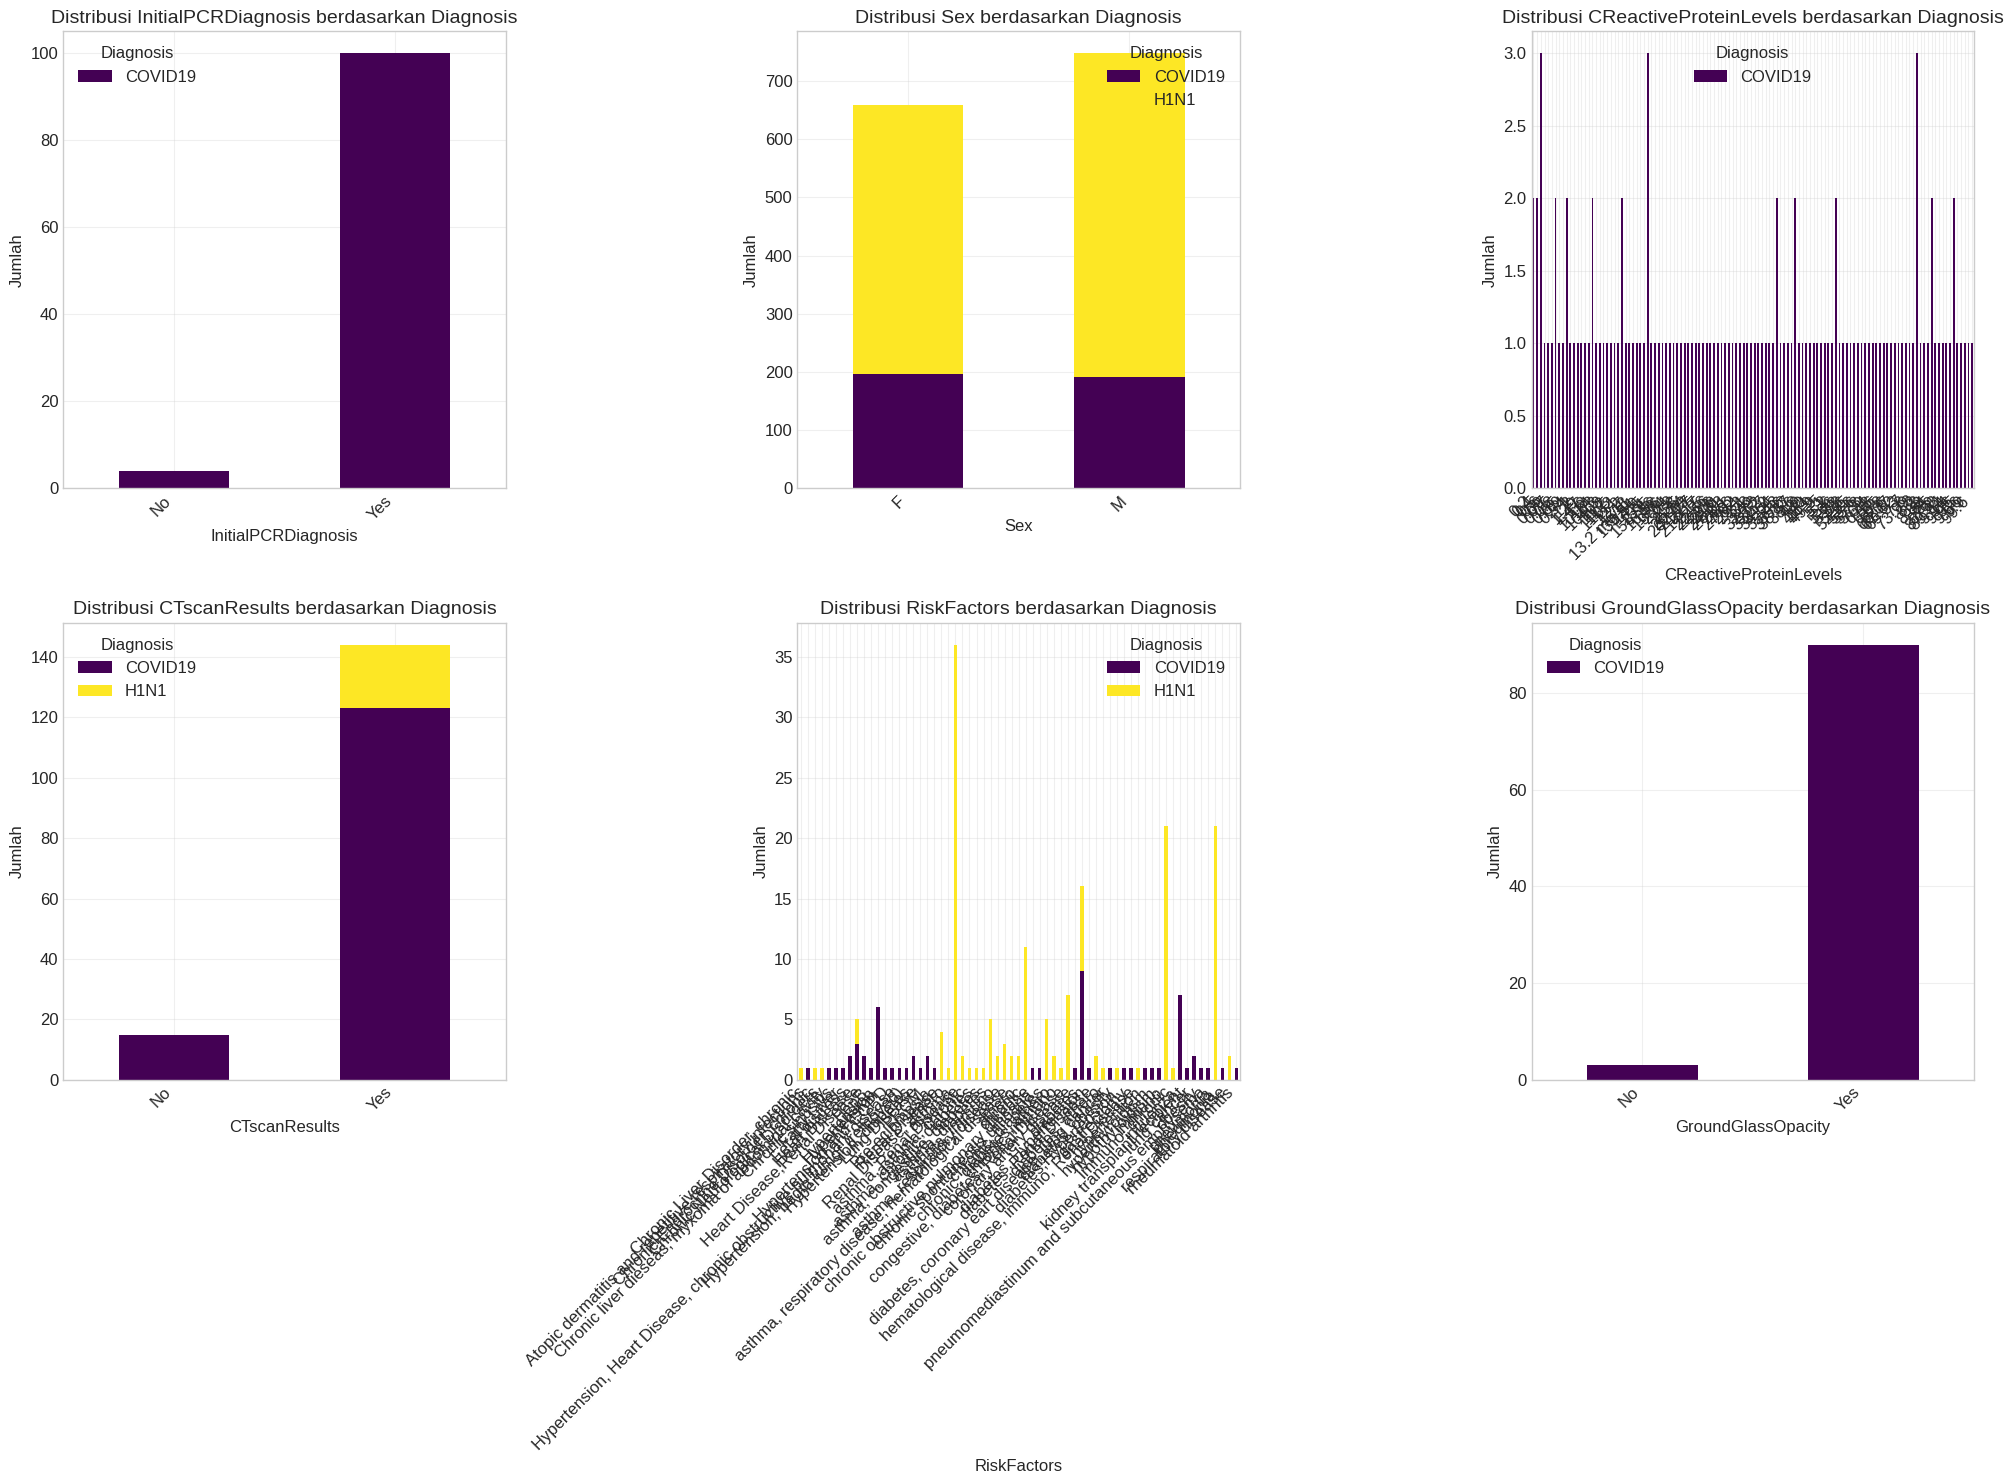

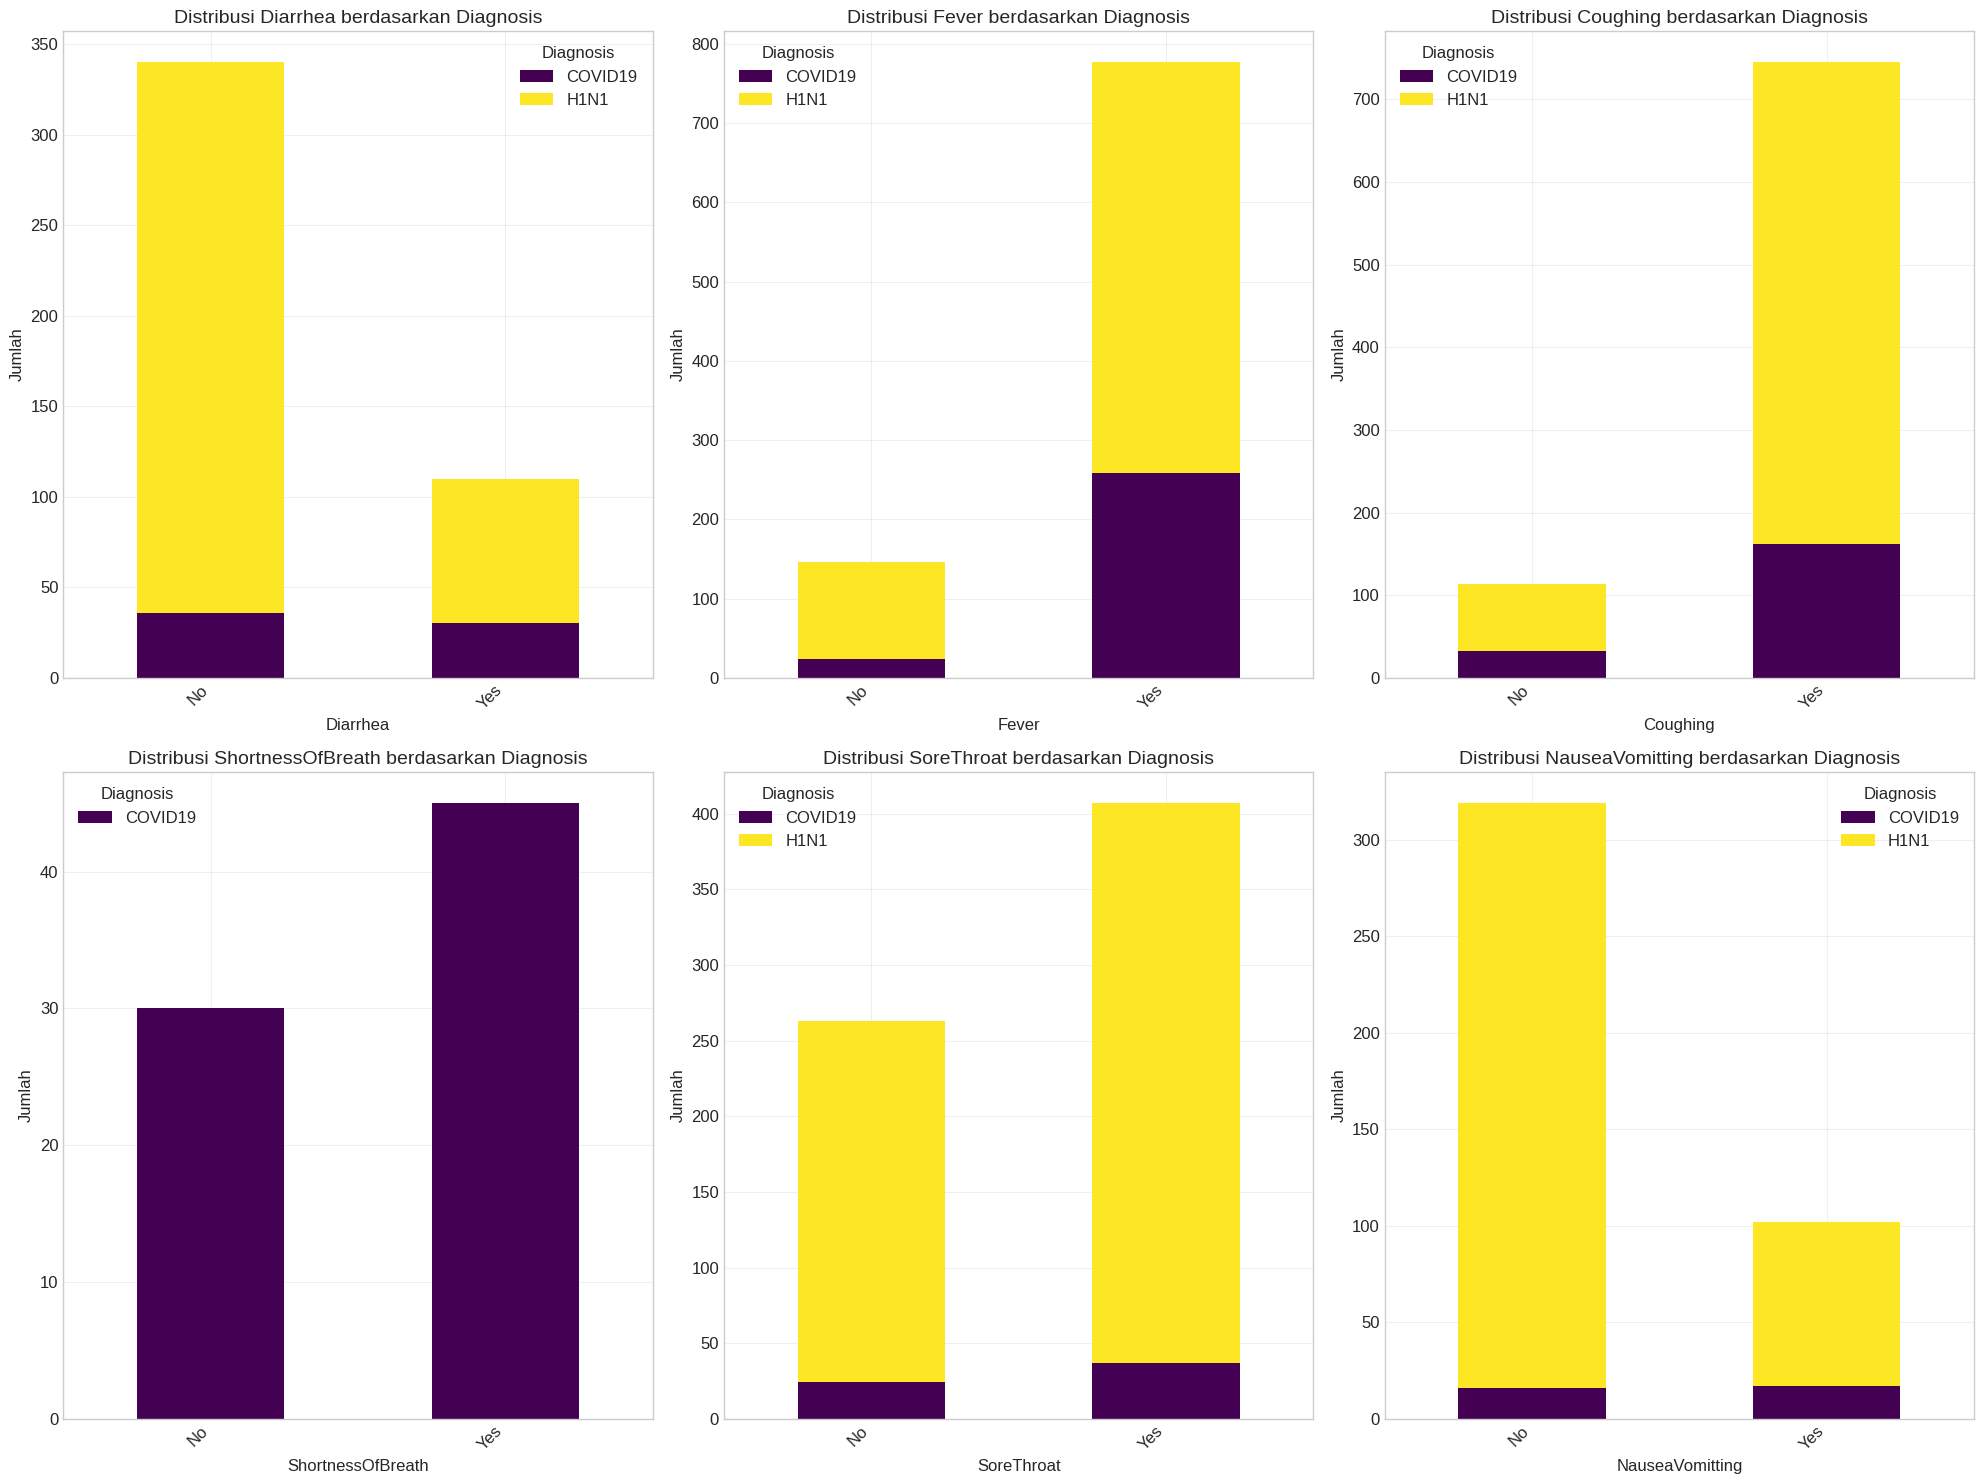

In [9]:
# Visualisasi distribusi variabel kategorik berdasarkan diagnosis
categorical_features = [col for col in categorical_columns if col != 'Diagnosis']

# Buat 2x3 subplot untuk 6 variabel kategorik penting
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features[:6]):
    plt.subplot(2, 3, i+1)
    cross_tab = pd.crosstab(df[col], df['Diagnosis'])
    cross_tab_pct = pd.crosstab(df[col], df['Diagnosis'], normalize='index') * 100

    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    plt.title(f'Distribusi {col} berdasarkan Diagnosis', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Diagnosis')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Buat 2x3 subplot untuk 6 variabel kategorik berikutnya jika ada
if len(categorical_features) > 6:
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(categorical_features[6:12]):
        if i >= 6: break  # Pastikan kita tidak melebihi 6 subplot
        plt.subplot(2, 3, i+1)
        cross_tab = pd.crosstab(df[col], df['Diagnosis'])
        cross_tab_pct = pd.crosstab(df[col], df['Diagnosis'], normalize='index') * 100

        cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
        plt.title(f'Distribusi {col} berdasarkan Diagnosis', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Jumlah', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Diagnosis')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

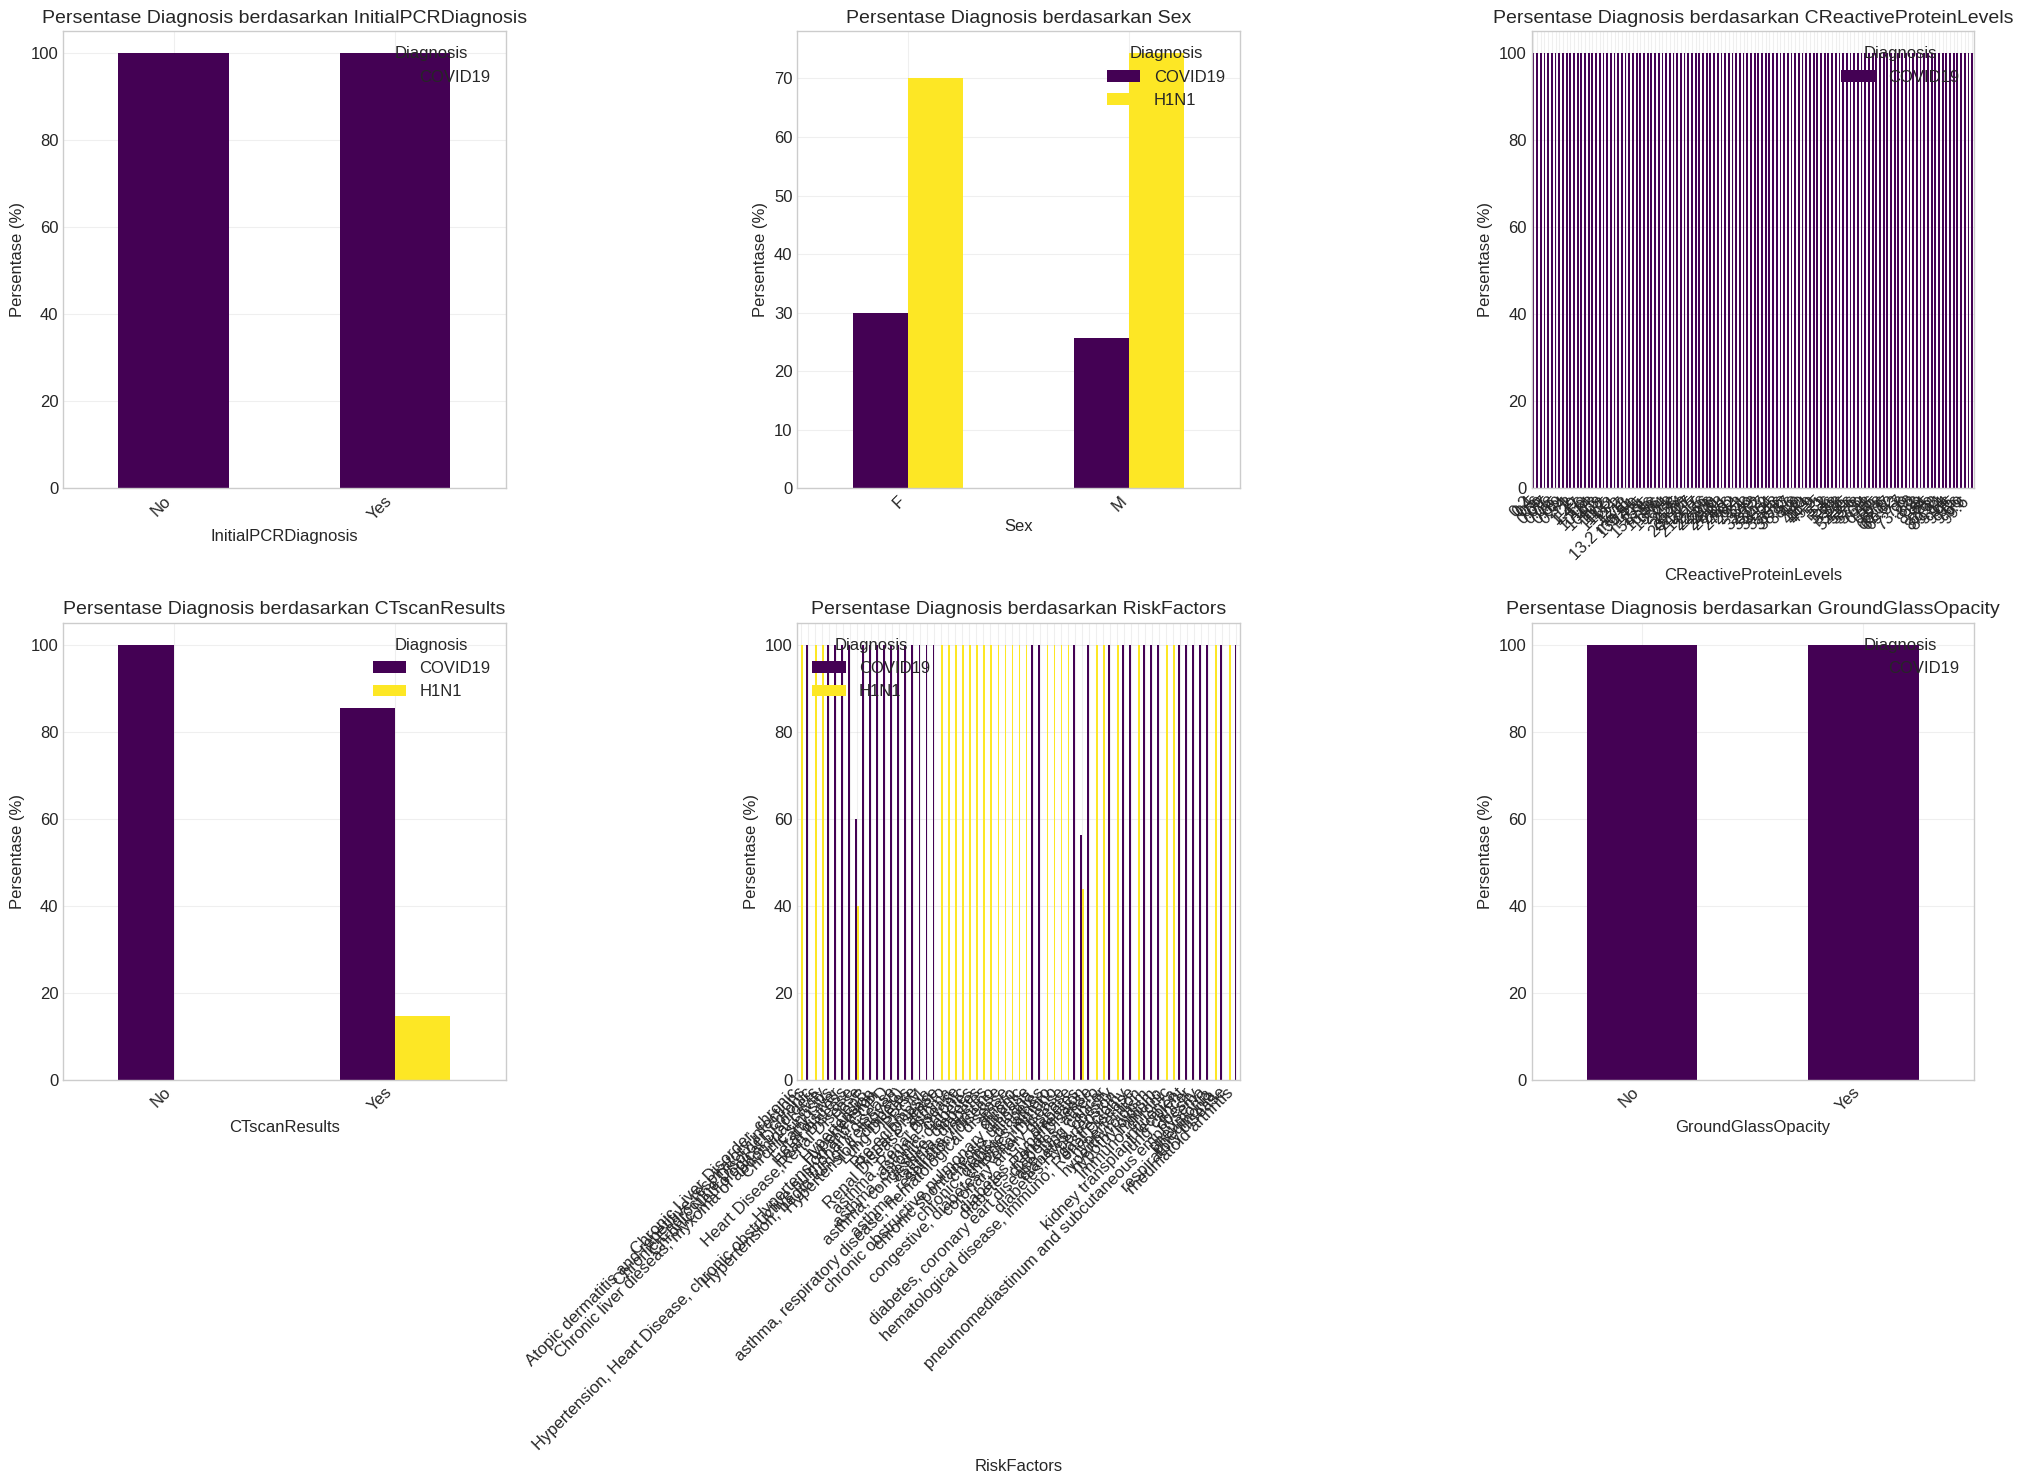

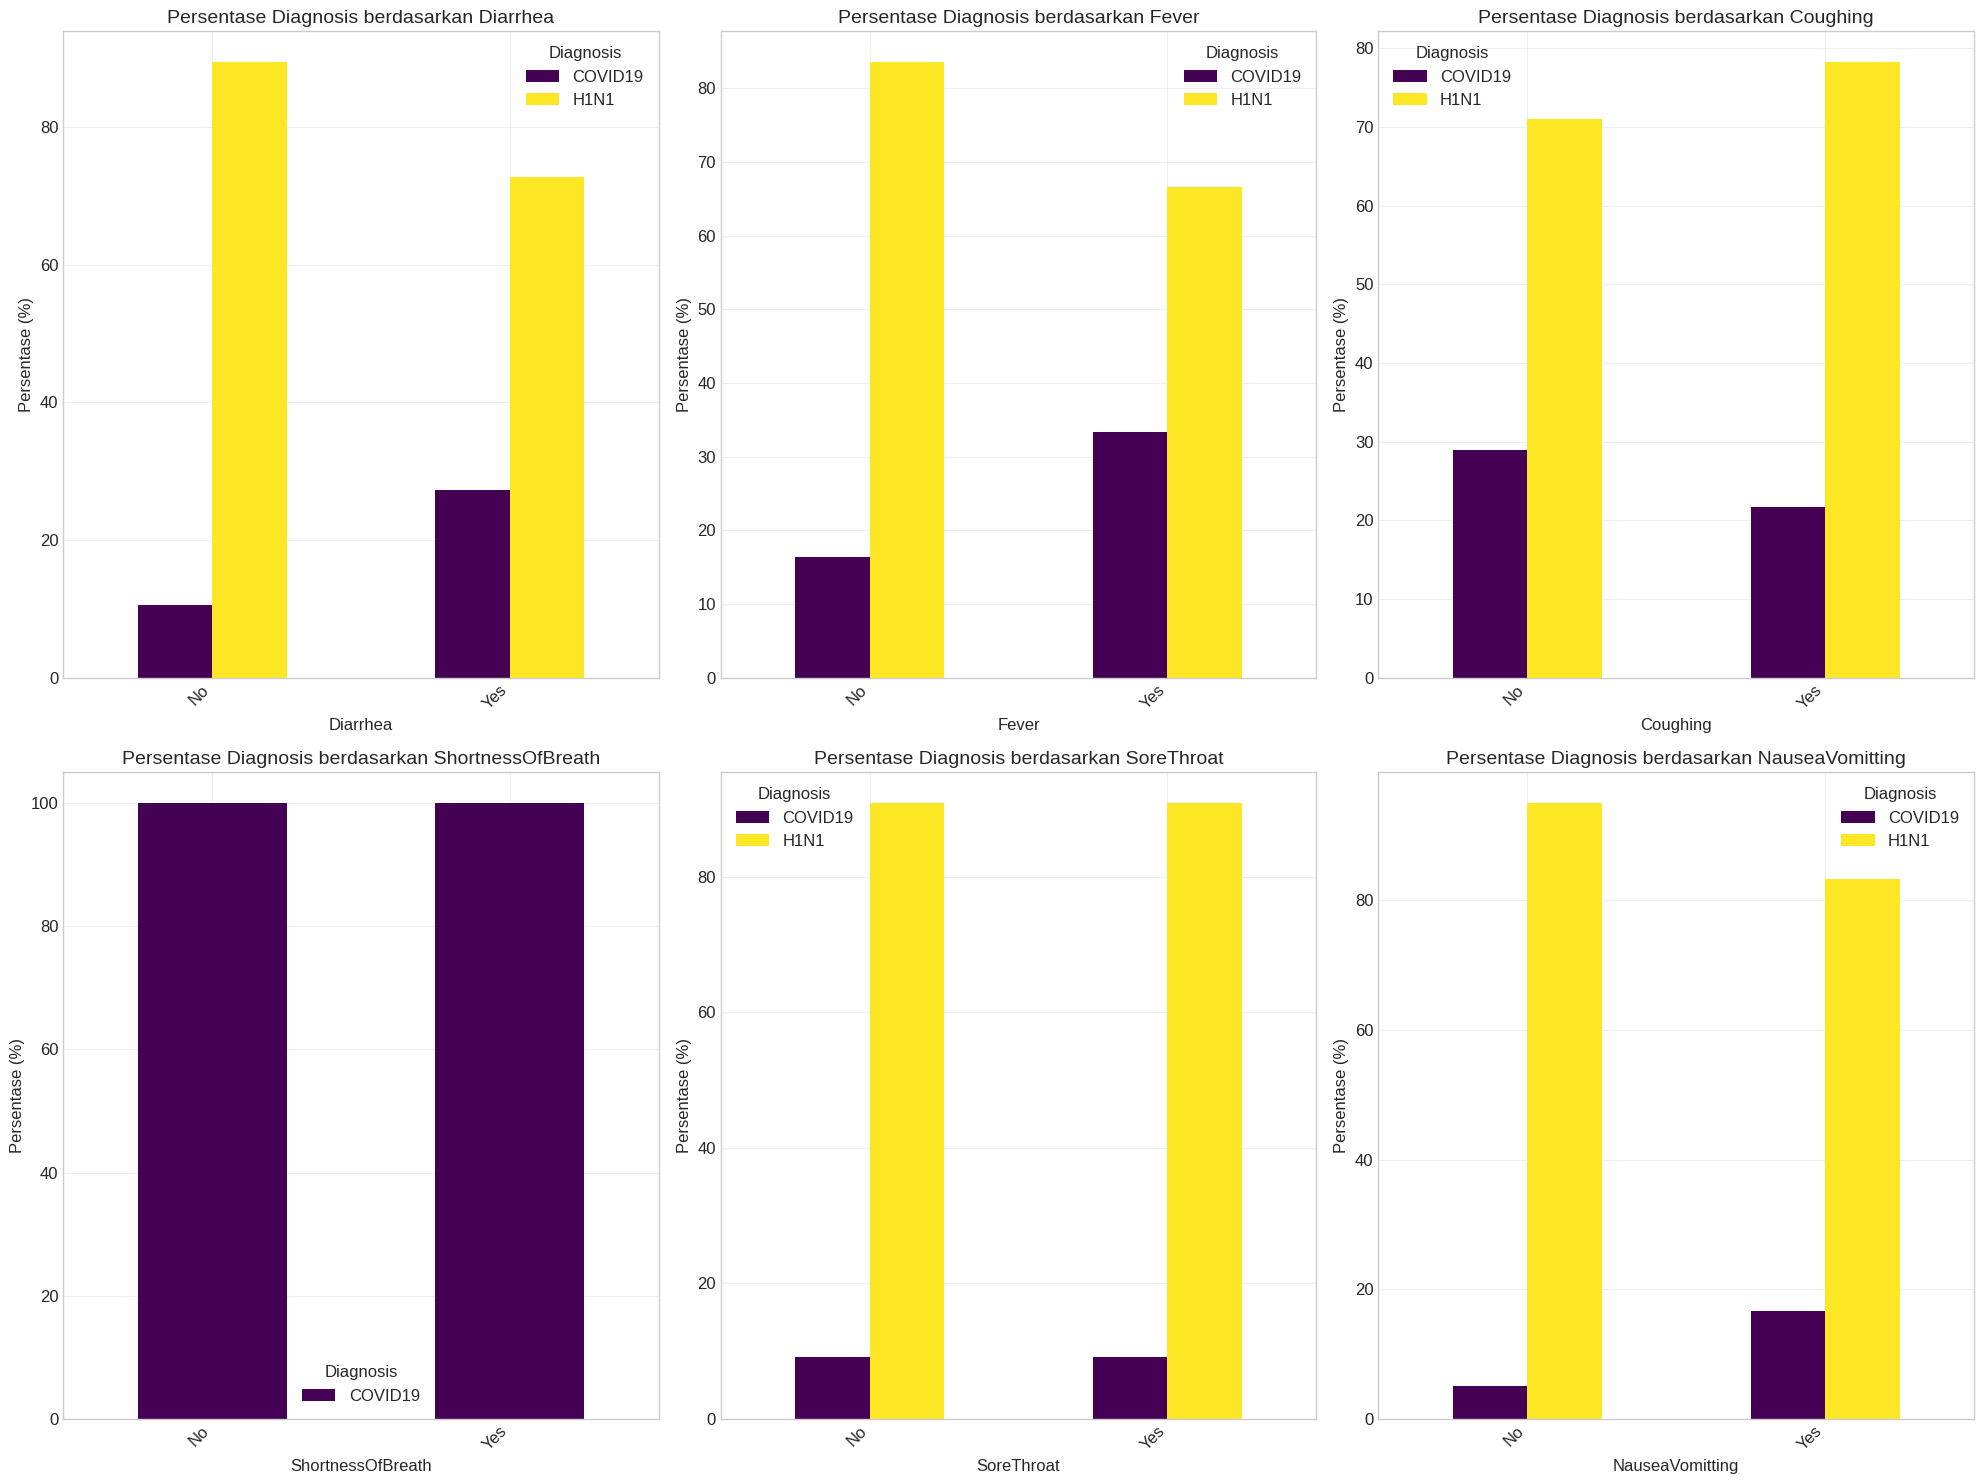

In [10]:
# Visualisasi persentase diagnosis untuk setiap variabel kategorik
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features[:6]):
    plt.subplot(2, 3, i+1)
    cross_tab_pct = pd.crosstab(df[col], df['Diagnosis'], normalize='index') * 100

    cross_tab_pct.plot(kind='bar', ax=plt.gca(), colormap='viridis')
    plt.title(f'Persentase Diagnosis berdasarkan {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Persentase (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Diagnosis')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Buat plot untuk 6 variabel kategorik berikutnya jika ada
if len(categorical_features) > 6:
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(categorical_features[6:12]):
        if i >= 6: break  # Pastikan kita tidak melebihi 6 subplot
        plt.subplot(2, 3, i+1)
        cross_tab_pct = pd.crosstab(df[col], df['Diagnosis'], normalize='index') * 100

        cross_tab_pct.plot(kind='bar', ax=plt.gca(), colormap='viridis')
        plt.title(f'Persentase Diagnosis berdasarkan {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Persentase (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Diagnosis')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

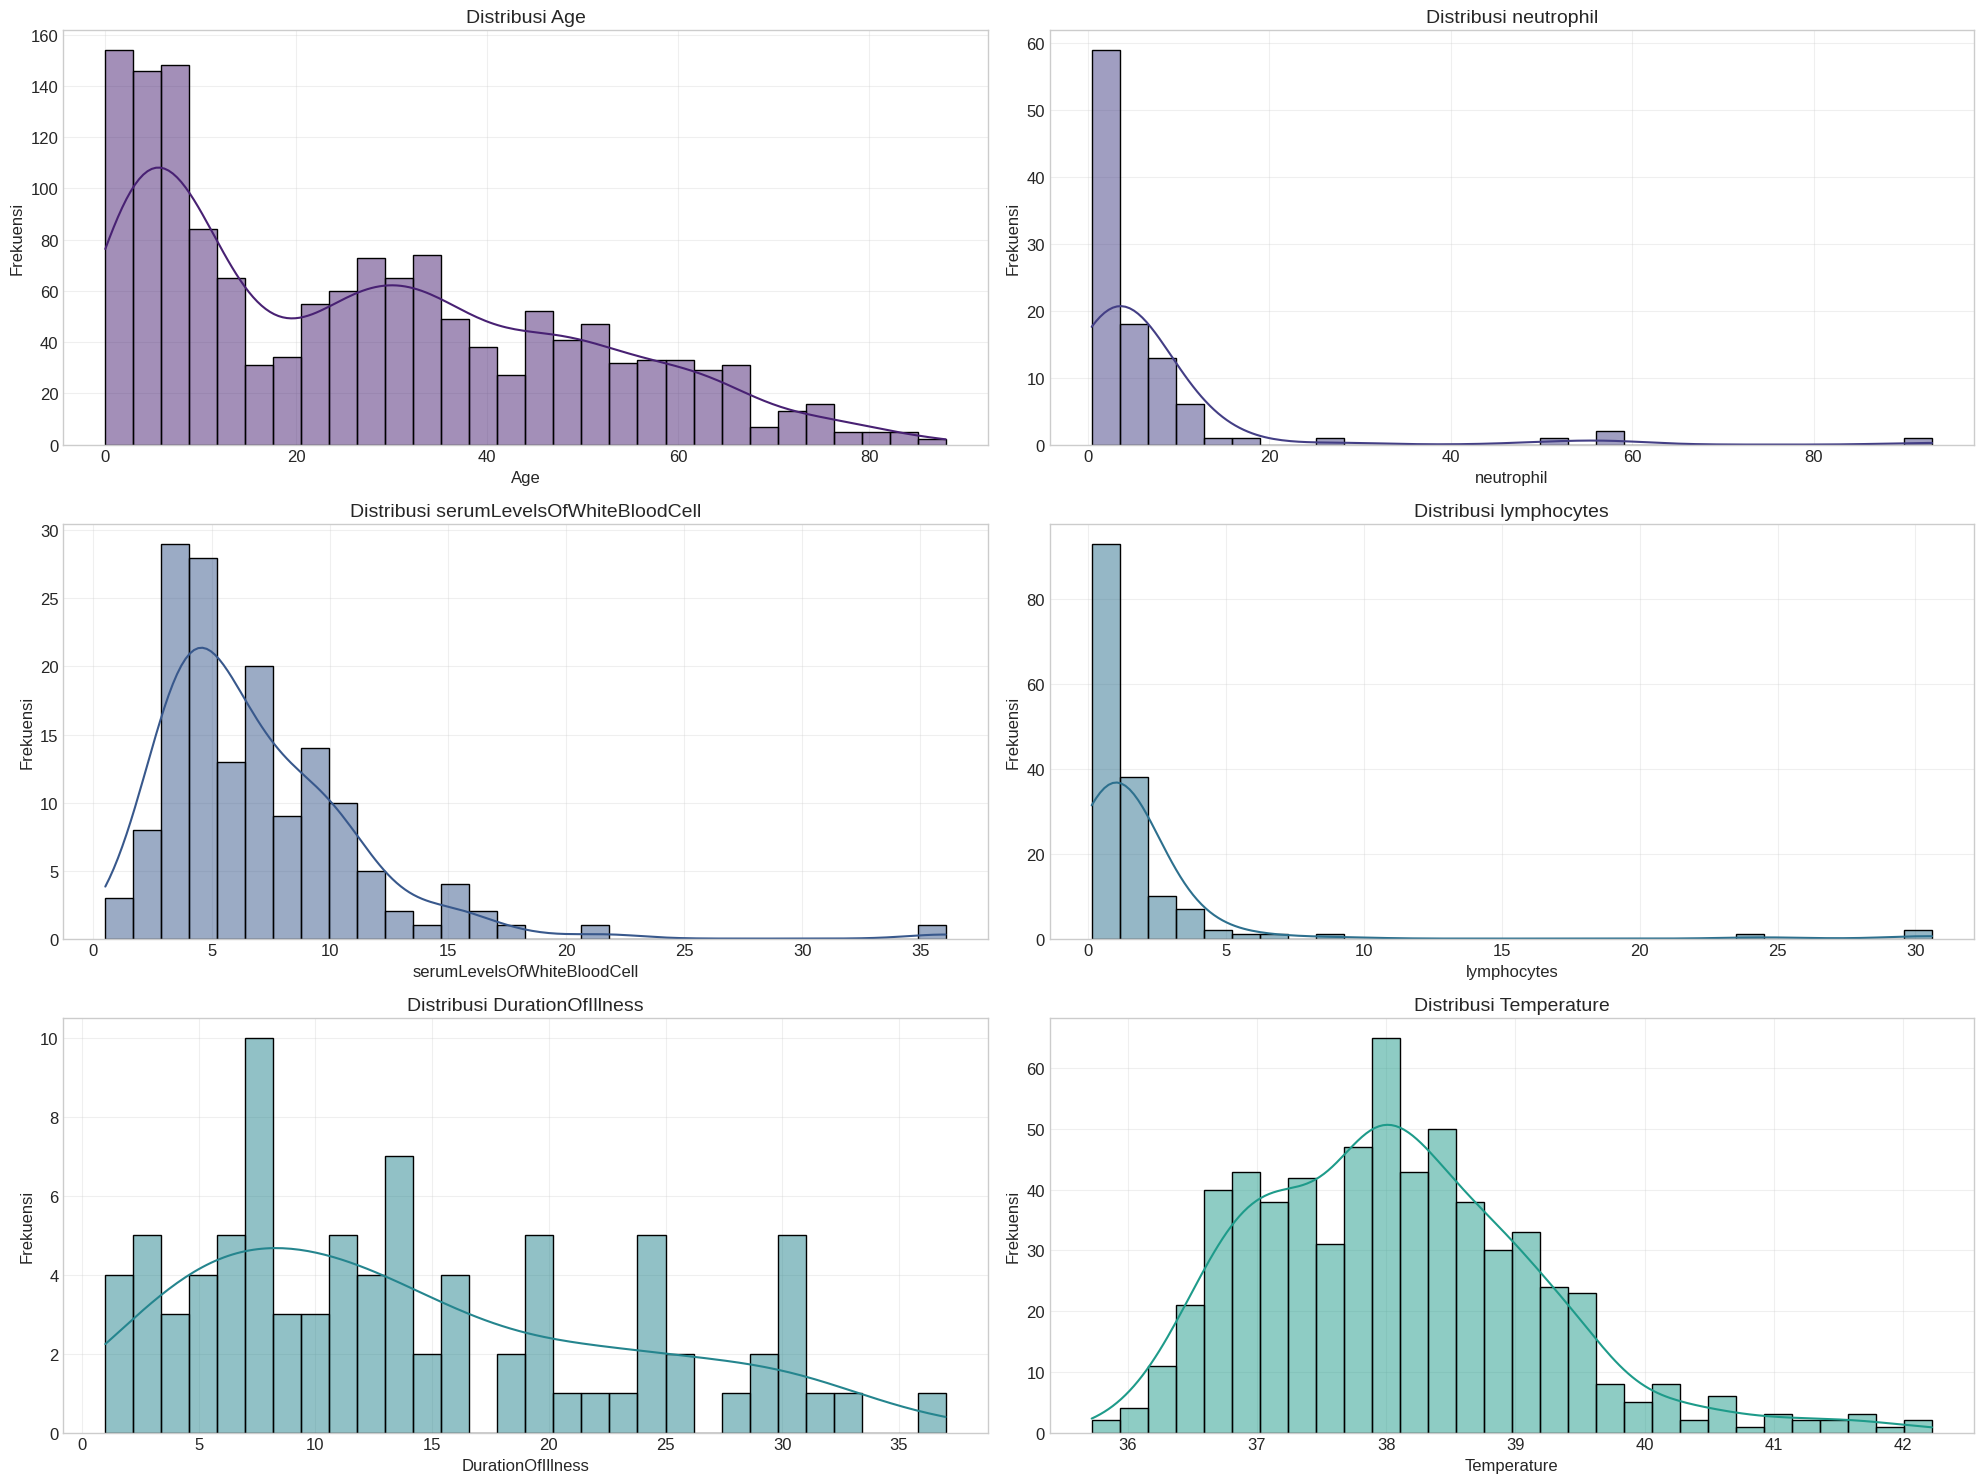

In [11]:
# Visualisasi distribusi variabel numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color=colors[i % len(colors)])
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

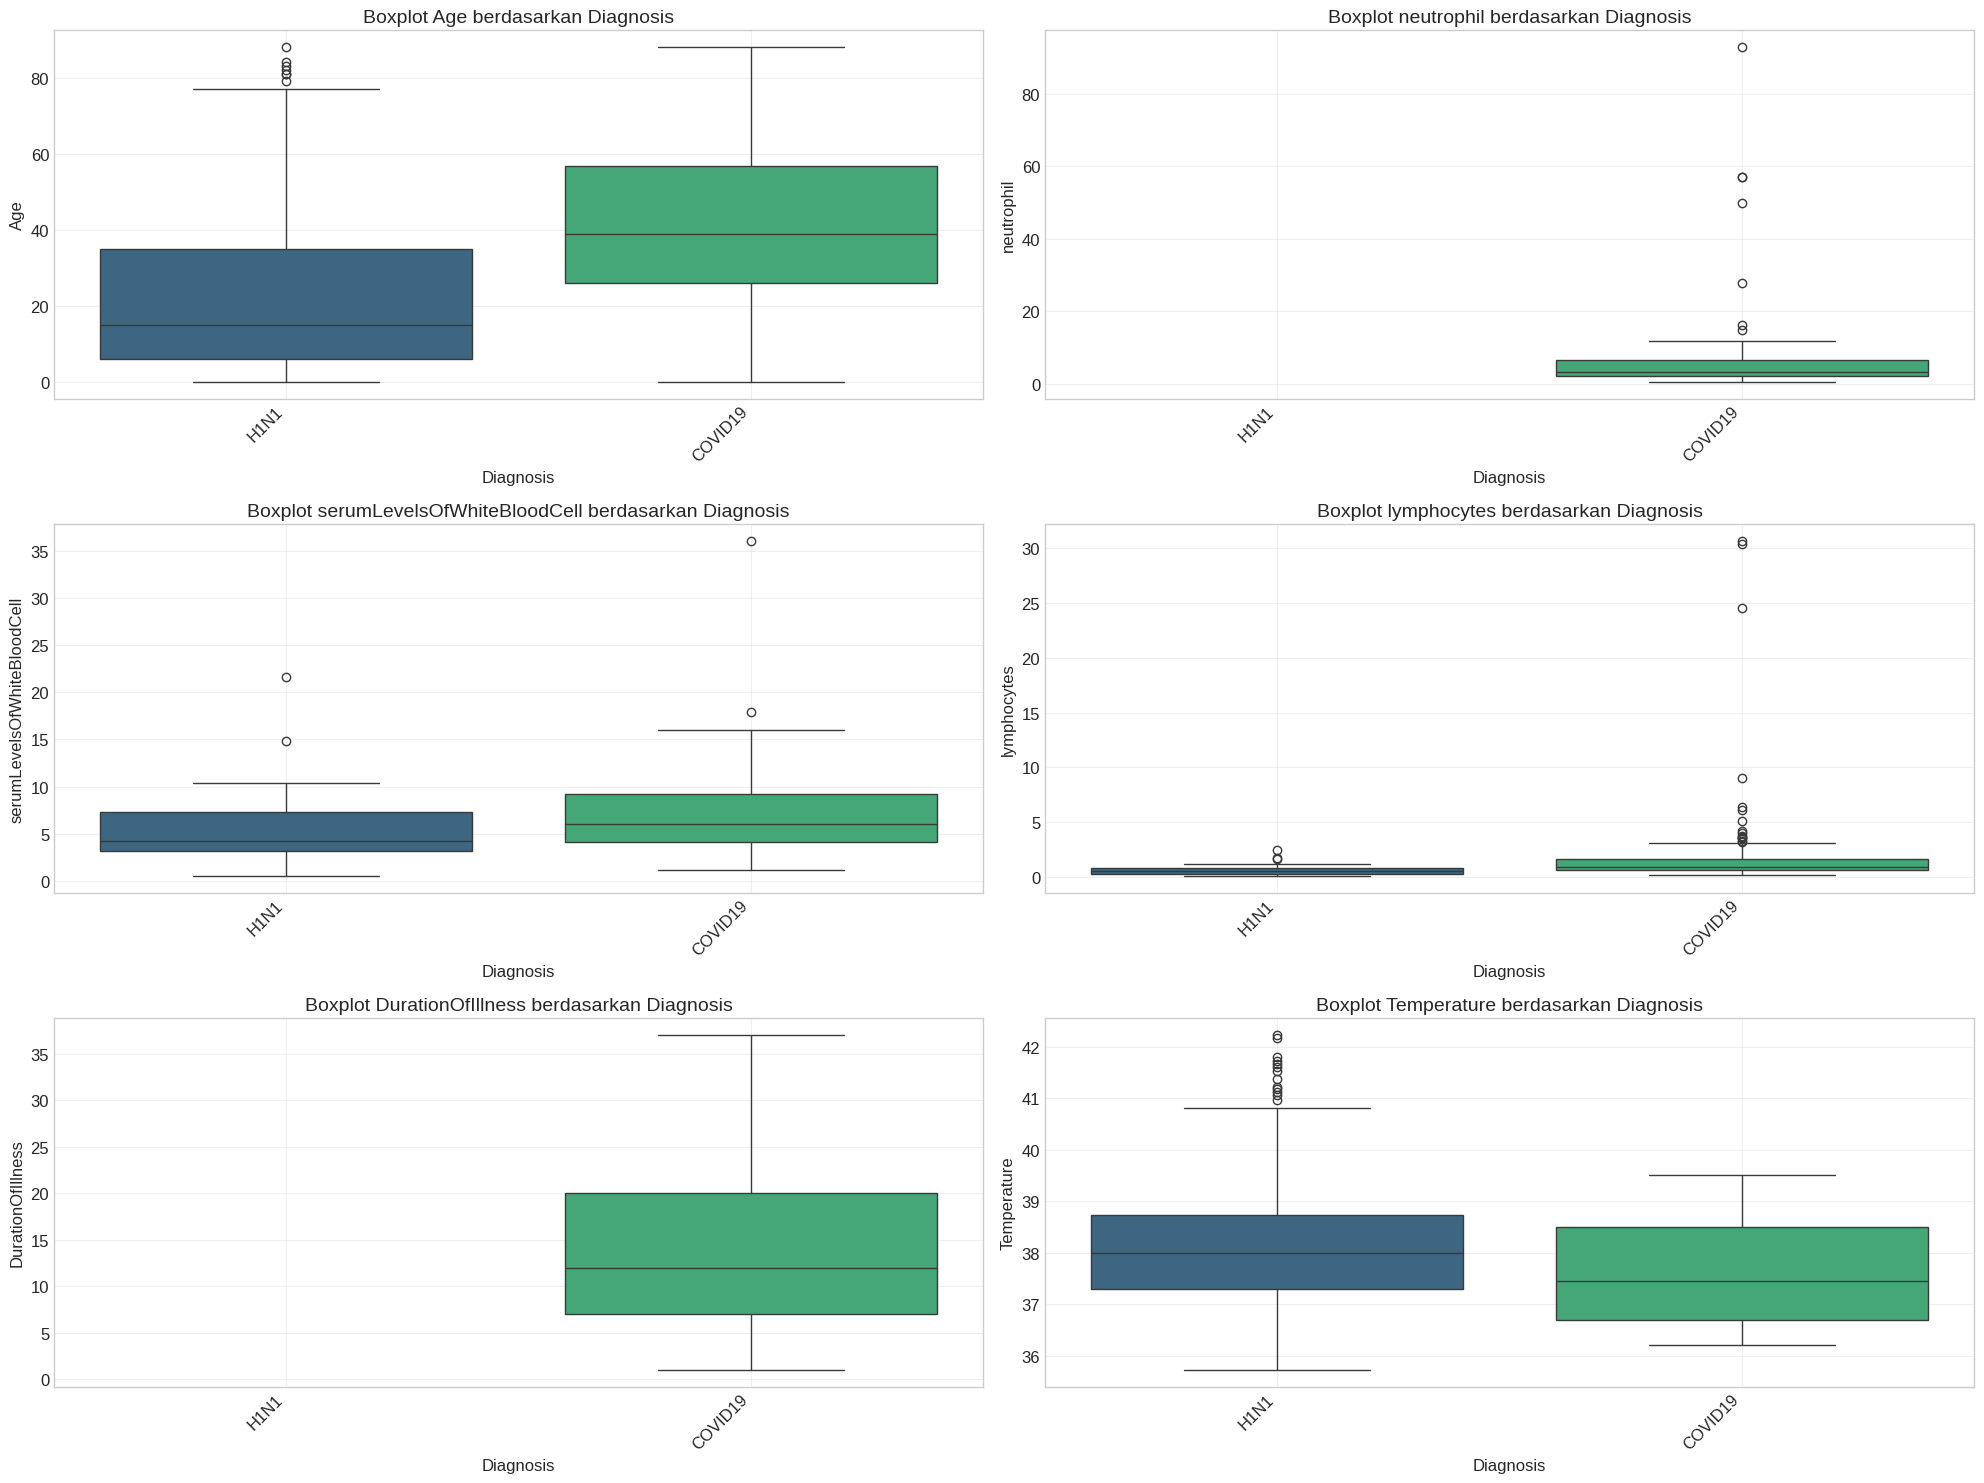

In [12]:
# Visualisasi boxplot variabel numerik berdasarkan diagnosis
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Diagnosis', y=col, data=df, palette='viridis')
    plt.title(f'Boxplot {col} berdasarkan Diagnosis', fontsize=14)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

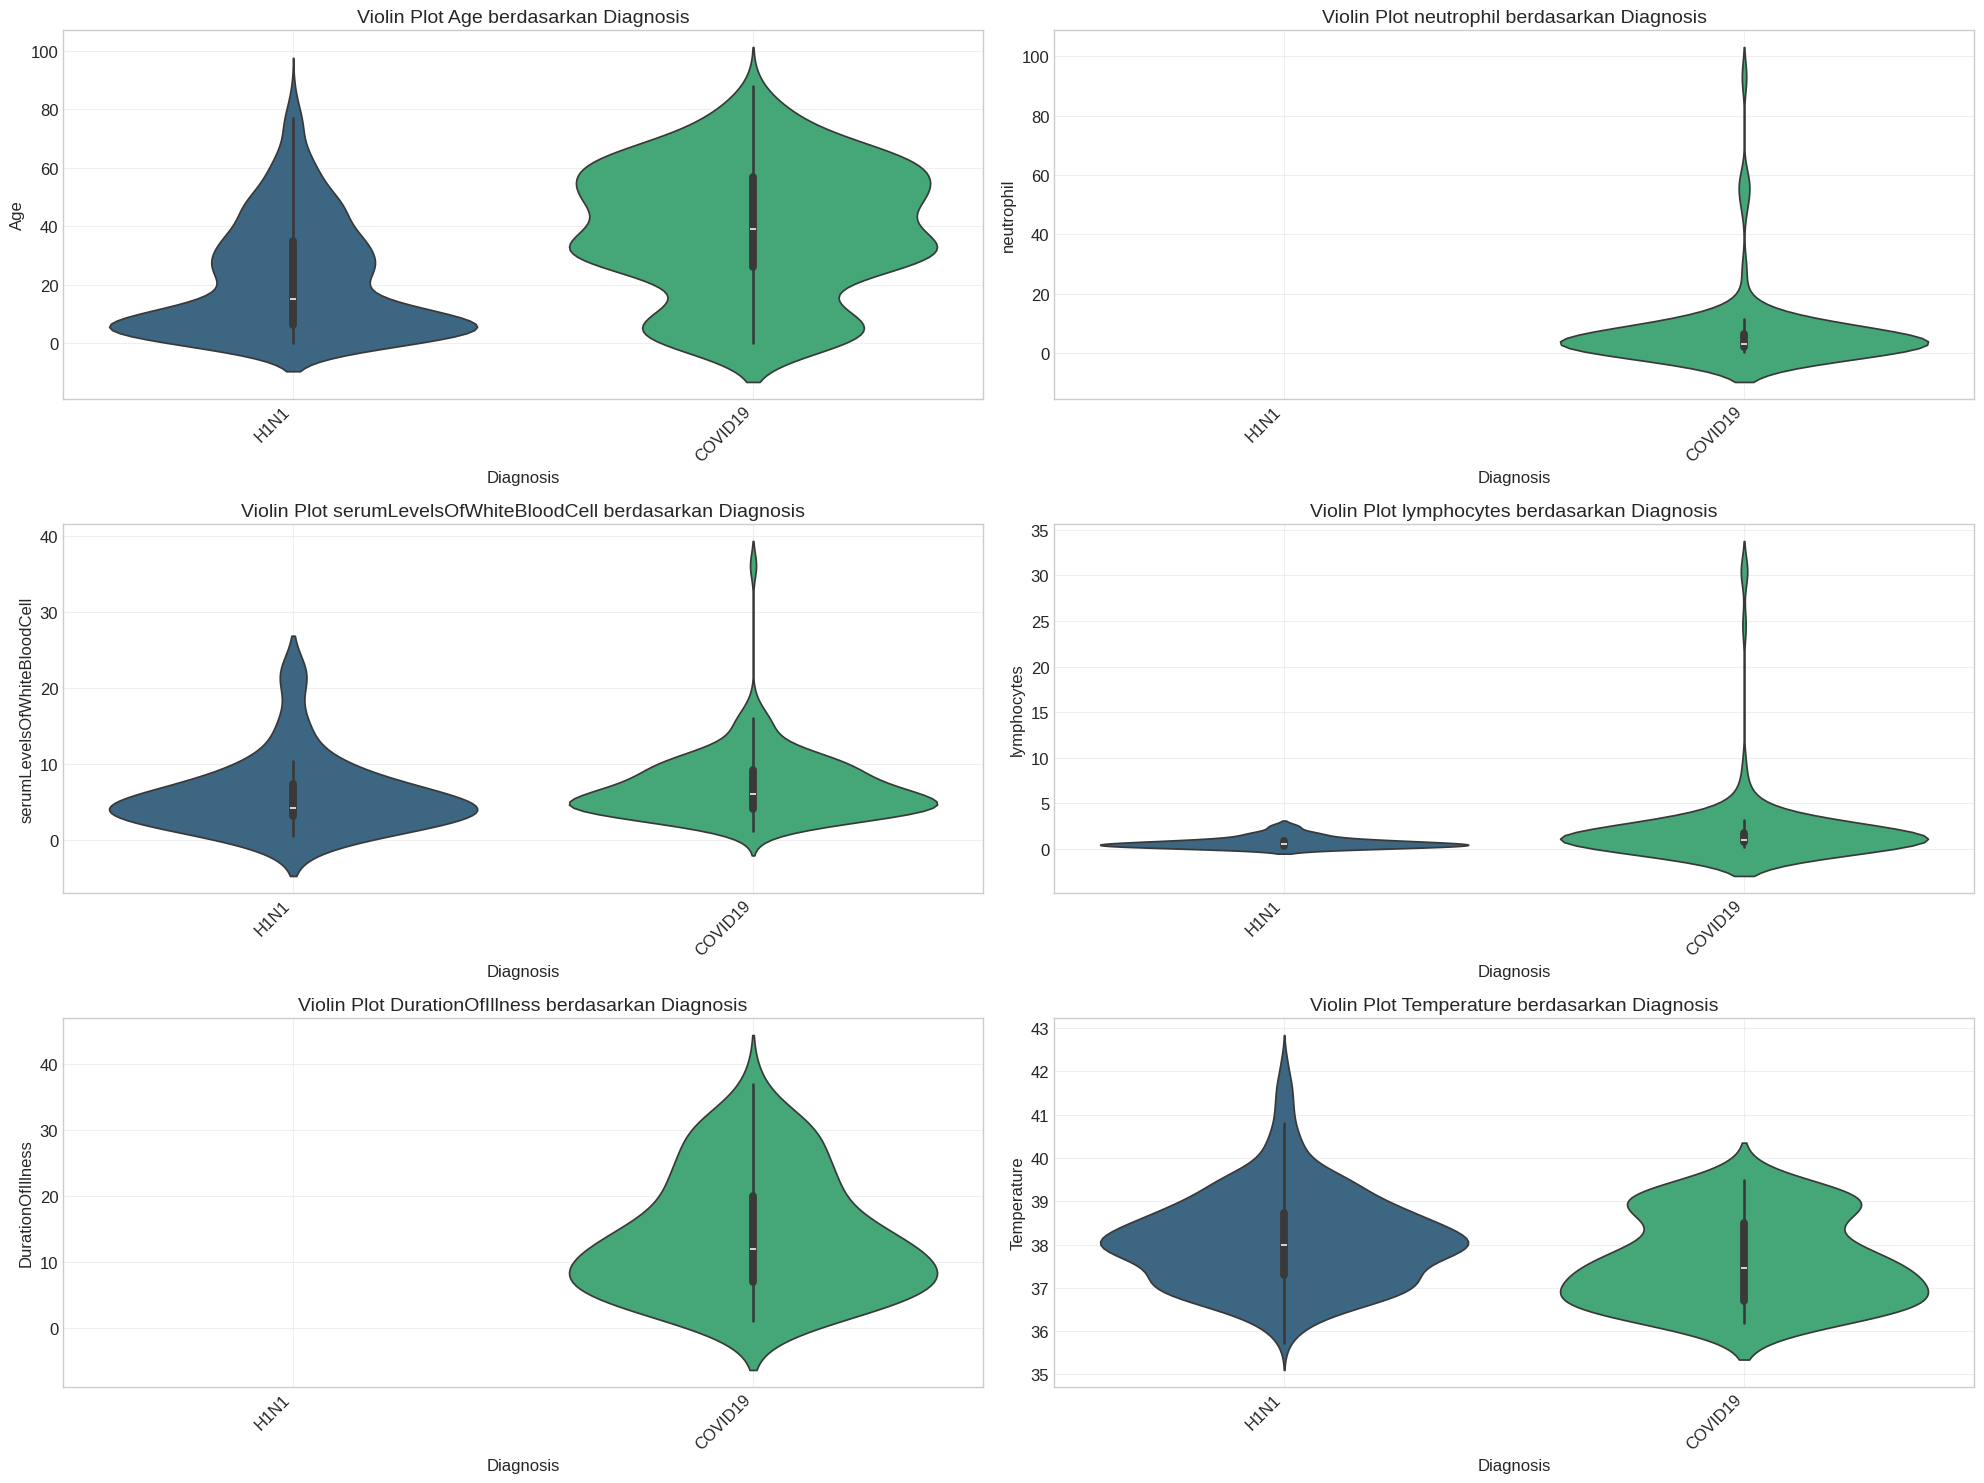

In [13]:
# Visualisasi violin plot untuk variabel numerik berdasarkan diagnosis
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.violinplot(x='Diagnosis', y=col, data=df, palette='viridis')
    plt.title(f'Violin Plot {col} berdasarkan Diagnosis', fontsize=14)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

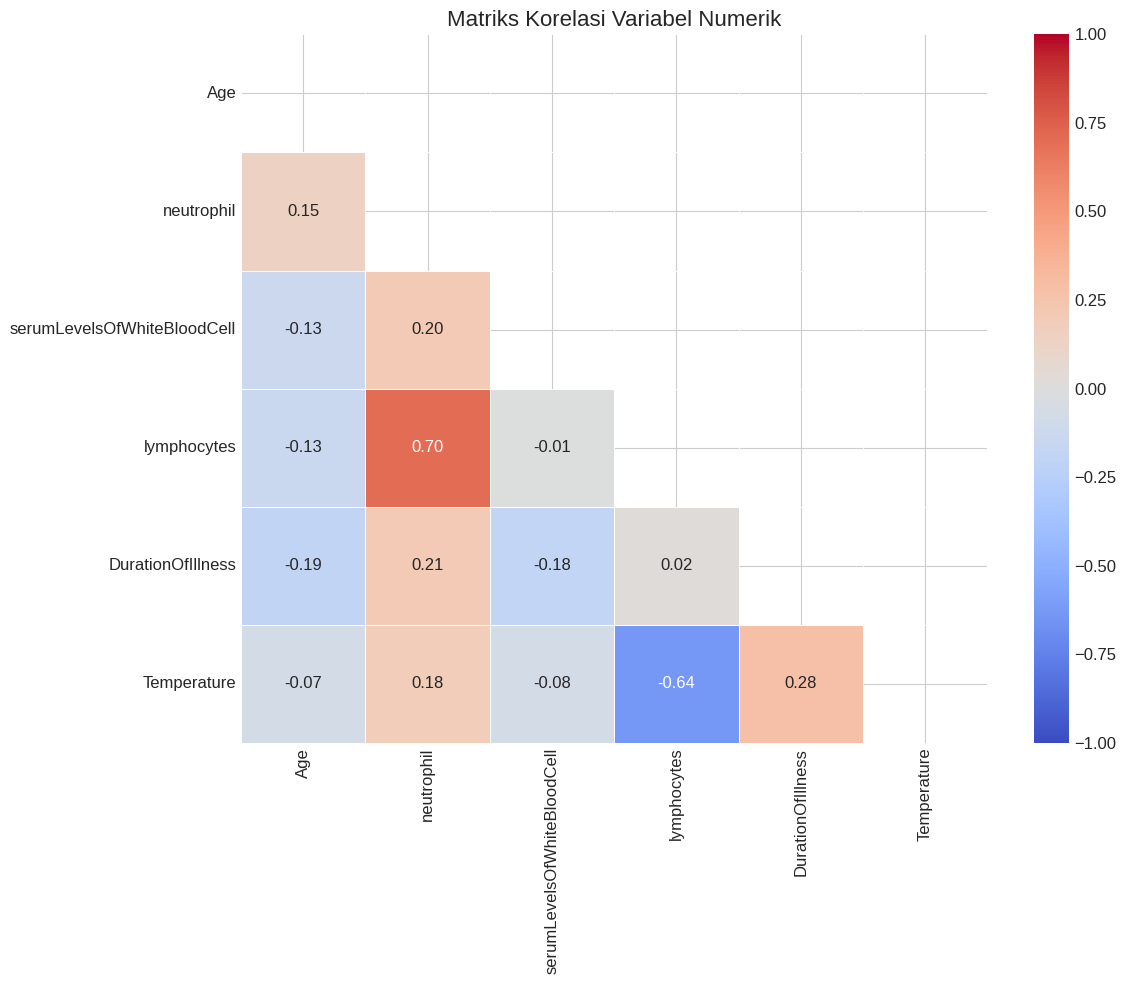

Penjelasan Korelasi:
1. Korelasi positif: Ketika satu variabel meningkat, variabel lain juga cenderung meningkat
2. Korelasi negatif: Ketika satu variabel meningkat, variabel lain cenderung menurun
3. Korelasi = 0: Tidak ada hubungan linear antara variabel
4. Korelasi mendekati 1 atau -1: Hubungan yang kuat
5. Korelasi mendekati 0: Hubungan yang lemah


In [14]:
# Matriks korelasi untuk variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
           linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Matriks Korelasi Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# Penjelasan korelasi
print("Penjelasan Korelasi:")
print("1. Korelasi positif: Ketika satu variabel meningkat, variabel lain juga cenderung meningkat")
print("2. Korelasi negatif: Ketika satu variabel meningkat, variabel lain cenderung menurun")
print("3. Korelasi = 0: Tidak ada hubungan linear antara variabel")
print("4. Korelasi mendekati 1 atau -1: Hubungan yang kuat")
print("5. Korelasi mendekati 0: Hubungan yang lemah")

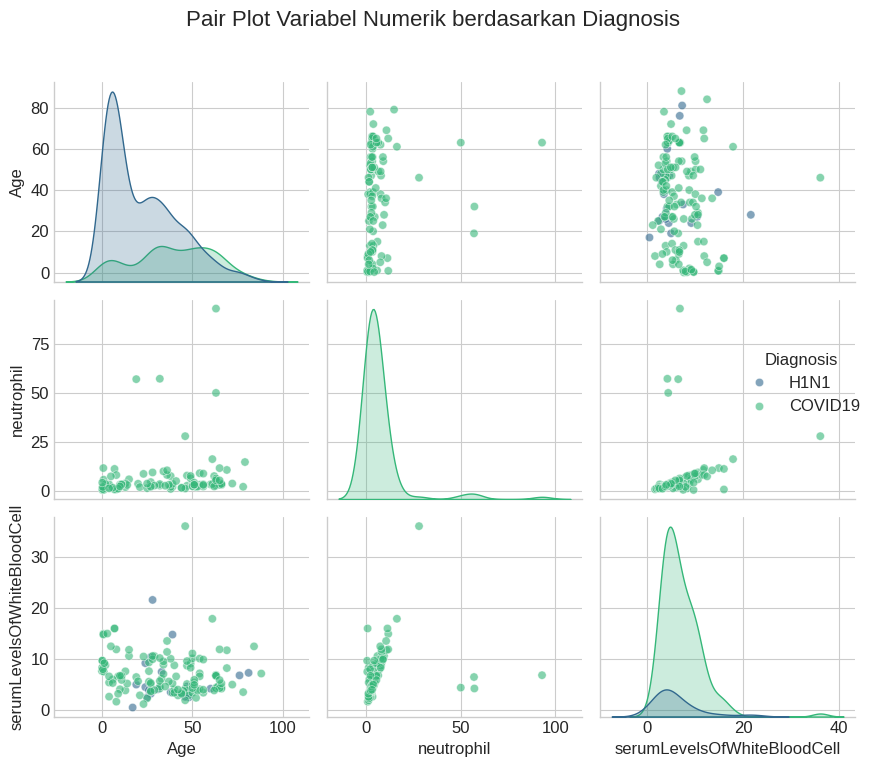

In [15]:
# Pair plot untuk variabel numerik dengan diagnosis
# Pilih subset variabel numerik untuk menghindari plot yang terlalu besar
selected_numeric = numeric_columns[:3] if len(numeric_columns) > 3 else numeric_columns
plot_data = df[selected_numeric + ['Diagnosis']].copy()

sns.pairplot(plot_data, hue='Diagnosis', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot Variabel Numerik berdasarkan Diagnosis', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 3. Feature Engineering
Pada bagian ini, kita akan:

Menangani nilai yang hilang
Encoding variabel kategorik
Scaling variabel numerik
Membuat fitur baru yang informatif

In [16]:
# Membuat salinan dataframe untuk feature engineering
df_fe = df.copy()

# Menangani nilai yang hilang
# Untuk kolom numerik, isi dengan median
for col in numeric_columns:
    if df_fe[col].isnull().sum() > 0:
        median_value = df_fe[col].median()
        print(f"Mengisi nilai yang hilang di kolom {col} dengan median: {median_value}")
        df_fe[col] = df_fe[col].fillna(median_value)

# Untuk kolom kategorik, isi dengan mode (nilai terbanyak)
for col in categorical_columns:
    if df_fe[col].isnull().sum() > 0:
        mode_value = df_fe[col].mode()[0]
        print(f"Mengisi nilai yang hilang di kolom {col} dengan mode: {mode_value}")
        df_fe[col] = df_fe[col].fillna(mode_value)

# Cek apakah masih ada nilai yang hilang
print("\nNilai yang hilang setelah imputasi:", df_fe.isnull().sum().sum())

Mengisi nilai yang hilang di kolom Age dengan median: 24.0
Mengisi nilai yang hilang di kolom neutrophil dengan median: 3.31
Mengisi nilai yang hilang di kolom serumLevelsOfWhiteBloodCell dengan median: 5.69
Mengisi nilai yang hilang di kolom lymphocytes dengan median: 0.9055
Mengisi nilai yang hilang di kolom DurationOfIllness dengan median: 12.0
Mengisi nilai yang hilang di kolom Temperature dengan median: 38.0
Mengisi nilai yang hilang di kolom InitialPCRDiagnosis dengan mode: Yes
Mengisi nilai yang hilang di kolom Sex dengan mode: M
Mengisi nilai yang hilang di kolom CReactiveProteinLevels dengan mode: 0.5
Mengisi nilai yang hilang di kolom CTscanResults dengan mode: Yes
Mengisi nilai yang hilang di kolom RiskFactors dengan mode: asthma
Mengisi nilai yang hilang di kolom GroundGlassOpacity dengan mode: Yes
Mengisi nilai yang hilang di kolom Diarrhea dengan mode: No
Mengisi nilai yang hilang di kolom Fever dengan mode: Yes
Mengisi nilai yang hilang di kolom Coughing dengan mode: Yes

In [17]:
# Label encoding untuk variabel target (Diagnosis)
le_diagnosis = LabelEncoder()
df_fe['Diagnosis_encoded'] = le_diagnosis.fit_transform(df_fe['Diagnosis'])

# Melihat mapping label encoding
diagnosis_mapping = dict(zip(le_diagnosis.classes_, le_diagnosis.transform(le_diagnosis.classes_)))
print("Mapping Label Encoding untuk Diagnosis:")
for diagnosis, code in diagnosis_mapping.items():
    print(f"{diagnosis} -> {code}")

Mapping Label Encoding untuk Diagnosis:
COVID19 -> 0
H1N1 -> 1


In [18]:
# One-hot encoding untuk variabel kategorik (kecuali Diagnosis)
categorical_features_to_encode = [col for col in categorical_columns if col != 'Diagnosis']

# Membuat variabel dummy
df_encoded = pd.get_dummies(df_fe, columns=categorical_features_to_encode, drop_first=False)

print(f"Jumlah kolom sebelum encoding: {df_fe.shape[1]}")
print(f"Jumlah kolom setelah encoding: {df_encoded.shape[1]}")

# Menampilkan beberapa kolom hasil encoding
encoded_cols = [col for col in df_encoded.columns if col not in df_fe.columns]
print(f"\nContoh kolom hasil encoding (5 pertama): {encoded_cols[:5]}")

Jumlah kolom sebelum encoding: 21
Jumlah kolom setelah encoding: 213

Contoh kolom hasil encoding (5 pertama): ['InitialPCRDiagnosis_No', 'InitialPCRDiagnosis_Yes', 'Sex_F', 'Sex_M', 'CReactiveProteinLevels_0.2']


In [19]:
# Membuat fitur baru
# 1. Rasio neutrophil/lymphocytes (NLR) - indikator penting untuk inflamasi
if 'neutrophil' in df_encoded.columns and 'lymphocytes' in df_encoded.columns:
    # Menghindari pembagian dengan nol dengan menambahkan epsilon kecil
    df_encoded['neutrophil_lymphocyte_ratio'] = df_encoded['neutrophil'] / (df_encoded['lymphocytes'] + 1e-10)
    print("Membuat fitur 'neutrophil_lymphocyte_ratio'")
    print(f"Statistik NLR:\n{df_encoded['neutrophil_lymphocyte_ratio'].describe()}\n")

# 2. Kategori usia
if 'Age' in df_encoded.columns:
    bins = [0, 18, 40, 60, 100]
    labels = ['0-18', '19-40', '41-60', '61+']
    # Gunakan variabel berbeda untuk age_group untuk menghindari conflict dengan kolom numerik
    age_categories = pd.cut(df_encoded['Age'], bins=bins, labels=labels)

    # One-hot encoding untuk kategori usia
    for label in labels:
        df_encoded[f'age_group_{label}'] = (age_categories == label).astype(int)

    print(f"Membuat kategori usia dan encoding: {labels}")

# 3. Flag untuk Temperature > 38 (demam tinggi)
if 'Temperature' in df_encoded.columns:
    df_encoded['high_fever'] = (df_encoded['Temperature'] > 38).astype(int)
    print(f"Membuat fitur 'high_fever' untuk suhu > 38°C")
    print(f"Persentase pasien dengan demam tinggi: {df_encoded['high_fever'].mean() * 100:.2f}%\n")

# 4. Total gejala yang dialami
symptom_columns = ['Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue', 'Diarrhea']
symptom_encoded_columns = []
# Identifikasi kolom gejala yang telah di-encode dengan nilai 'Yes'
for col in symptom_columns:
    yes_col = f"{col}_Yes"
    if yes_col in df_encoded.columns:
        symptom_encoded_columns.append(yes_col)

if symptom_encoded_columns:
    df_encoded['total_symptoms'] = df_encoded[symptom_encoded_columns].sum(axis=1)
    print(f"Membuat fitur 'total_symptoms' dari {len(symptom_encoded_columns)} gejala")
    print(f"Statistik Total Gejala:\n{df_encoded['total_symptoms'].describe()}\n")

Membuat fitur 'neutrophil_lymphocyte_ratio'
Statistik NLR:
count    1482.000000
mean        3.857774
std         2.435978
min         0.198128
25%         3.655439
50%         3.655439
75%         3.655439
max        58.000000
Name: neutrophil_lymphocyte_ratio, dtype: float64

Membuat kategori usia dan encoding: ['0-18', '19-40', '41-60', '61+']
Membuat fitur 'high_fever' untuk suhu > 38°C
Persentase pasien dengan demam tinggi: 19.84%

Membuat fitur 'total_symptoms' dari 7 gejala
Statistik Total Gejala:
count    1482.000000
mean        4.646424
std         0.984253
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         7.000000
Name: total_symptoms, dtype: float64



In [20]:
# Scaling variabel numerik
# Identifikasi kolom numerik asli yang akan di-scale (bukan hasil encoding atau fitur baru)
numeric_cols_to_scale = [col for col in numeric_columns]

# Tambahkan fitur numerik baru yang telah dibuat
if 'neutrophil_lymphocyte_ratio' in df_encoded.columns:
    numeric_cols_to_scale.append('neutrophil_lymphocyte_ratio')
if 'total_symptoms' in df_encoded.columns:
    numeric_cols_to_scale.append('total_symptoms')

# Melakukan scaling
scaler = StandardScaler()
df_encoded[numeric_cols_to_scale] = scaler.fit_transform(df_encoded[numeric_cols_to_scale])

# Menampilkan hasil scaling
print("Statistik setelah scaling untuk variabel numerik:")
print(df_encoded[numeric_cols_to_scale].describe().T[['mean', 'std', 'min', 'max']])

print("\nPenjelasan StandardScaler:")
print("StandardScaler melakukan transformasi dengan mengikuti formula:")
print("X_scaled = (X - μ) / σ")
print("dimana μ adalah rata-rata (mean) dan σ adalah standar deviasi.")
print("Setelah scaling, distribusi data akan memiliki rata-rata = 0 dan standar deviasi = 1")

Statistik setelah scaling untuk variabel numerik:
                                     mean       std       min        max
Age                          9.588971e-17  1.000338 -1.241783   2.893679
neutrophil                   2.541077e-16  1.000338 -0.901788  25.932815
serumLevelsOfWhiteBloodCell  7.287618e-16  1.000338 -3.716245  21.169383
lymphocytes                  9.588971e-18  1.000338 -0.666862  22.556841
DurationOfIllness            2.253408e-16  1.000338 -4.989496  11.168295
Temperature                  2.195874e-15  1.000338 -3.236649   5.883735
neutrophil_lymphocyte_ratio  1.726015e-16  1.000338 -1.502838  22.233578
total_symptoms              -2.876691e-17  1.000338 -3.706011   2.392037

Penjelasan StandardScaler:
StandardScaler melakukan transformasi dengan mengikuti formula:
X_scaled = (X - μ) / σ
dimana μ adalah rata-rata (mean) dan σ adalah standar deviasi.
Setelah scaling, distribusi data akan memiliki rata-rata = 0 dan standar deviasi = 1


In [21]:
# Deteksi outlier dengan metode IQR
outliers_count = {}

for col in numeric_columns:
    # Menghitung Q1, Q3, dan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outliers_count[col] = outliers

    # Menambahkan flag outlier
    df_encoded[f"{col}_is_outlier"] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

# Menampilkan jumlah outlier untuk setiap variabel
outliers_df = pd.DataFrame({
    'Jumlah Outlier': outliers_count,
    'Persentase (%)': {k: v/len(df)*100 for k, v in outliers_count.items()}
})

print("Penjelasan Metode IQR untuk deteksi outlier:")
print("1. Q1 (kuartil pertama): 25% data berada di bawah nilai ini")
print("2. Q3 (kuartil ketiga): 75% data berada di bawah nilai ini")
print("3. IQR (Inter-Quartile Range): Selisih antara Q3 dan Q1")
print("4. Batas bawah outlier: Q1 - 1.5 * IQR")
print("5. Batas atas outlier: Q3 + 1.5 * IQR")
print("\nData di luar batas ini dianggap sebagai outlier.\n")

outliers_df.sort_values('Jumlah Outlier', ascending=False)

Penjelasan Metode IQR untuk deteksi outlier:
1. Q1 (kuartil pertama): 25% data berada di bawah nilai ini
2. Q3 (kuartil ketiga): 75% data berada di bawah nilai ini
3. IQR (Inter-Quartile Range): Selisih antara Q3 dan Q1
4. Batas bawah outlier: Q1 - 1.5 * IQR
5. Batas atas outlier: Q3 + 1.5 * IQR

Data di luar batas ini dianggap sebagai outlier.



,Jumlah Outlier,Persentase (%)
lymphocytes,16,1.079622
Temperature,12,0.809717
neutrophil,7,0.472335
serumLevelsOfWhiteBloodCell,3,0.202429
Age,0,0.000000
DurationOfIllness,0,0.000000


# 4. Persiapan Data untuk Pemodelan

In [22]:
# Menyiapkan fitur (X) dan target (y)
# Hapus kolom original Diagnosis dan kolom-kolom redundan
X = df_encoded.drop(['Diagnosis', 'Diagnosis_encoded'], axis=1)
y = df_encoded['Diagnosis_encoded']

# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data training: {X_train.shape[0]} ({X_train.shape[0]/len(df):.1%})")
print(f"Jumlah data testing: {X_test.shape[0]} ({X_test.shape[0]/len(df):.1%})")
print(f"Jumlah fitur: {X_train.shape[1]}")
print(f"Distribusi kelas pada data training:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"Distribusi kelas pada data testing:\n{pd.Series(y_test).value_counts().sort_index()}")

Jumlah data training: 1185 (80.0%)
Jumlah data testing: 297 (20.0%)
Jumlah fitur: 224
Distribusi kelas pada data training:
Diagnosis_encoded
0    328
1    857
Name: count, dtype: int64
Distribusi kelas pada data testing:
Diagnosis_encoded
0     82
1    215
Name: count, dtype: int64


# 5. Penjelasan Metrik Evaluasi
Berikut adalah penjelasan detail tentang metrik evaluasi yang akan digunakan untuk menilai performa model klasifikasi:

In [23]:
print("Penjelasan Metrik Evaluasi Klasifikasi:")
print("\n1. Confusion Matrix:")
print("   Matrix yang menunjukkan prediksi vs nilai aktual.")
print("   Untuk klasifikasi biner, terdiri dari:")
print("   - True Positive (TP): Positif yang diprediksi benar sebagai positif")
print("   - True Negative (TN): Negatif yang diprediksi benar sebagai negatif")
print("   - False Positive (FP): Negatif yang salah diprediksi sebagai positif (Type I error)")
print("   - False Negative (FN): Positif yang salah diprediksi sebagai negatif (Type II error)")
print("   Untuk klasifikasi multi-kelas, setiap kelas i dapat dianggap sebagai biner dengan")
print("   menggunakan pendekatan 'one-vs-rest' (kelas i vs semua kelas lainnya).")

print("\n2. Akurasi (Accuracy):")
print("   Akurasi = (TP + TN) / (TP + TN + FP + FN)")
print("   Atau secara umum: Jumlah prediksi benar / Total prediksi")
print("   Proporsi total prediksi yang benar. Semakin tinggi nilainya, semakin baik model.")
print("   Kekurangan: Tidak efektif untuk data yang tidak seimbang (imbalanced).")

print("\n3. Presisi (Precision):")
print("   Presisi = TP / (TP + FP)")
print("   Mengukur seberapa akurat prediksi positif model. Dari semua yang diprediksi positif, berapa yang benar-benar positif.")
print("   Untuk multi-kelas: Precision_macro adalah rata-rata precision untuk setiap kelas.")
print("   Gunakan saat biaya false positive tinggi.")

print("\n4. Recall (Sensitivity, True Positive Rate):")
print("   Recall = TP / (TP + FN)")
print("   Mengukur kemampuan model untuk mendeteksi kelas positif. Dari semua yang sebenarnya positif, berapa yang berhasil diprediksi benar.")
print("   Untuk multi-kelas: Recall_macro adalah rata-rata recall untuk setiap kelas.")
print("   Gunakan saat biaya false negative tinggi.")

print("\n5. F1-Score:")
print("   F1 = 2 * (Precision * Recall) / (Precision + Recall)")
print("   Rata-rata harmonik dari presisi dan recall. Menyeimbangkan kedua metrik.")
print("   Baik digunakan saat data tidak seimbang atau ketika ingin menyeimbangkan presisi dan recall.")
print("   Untuk multi-kelas: F1_macro adalah rata-rata F1-score untuk setiap kelas.")

print("\n6. AUC (Area Under the ROC Curve):")
print("   Mengukur area di bawah kurva ROC. Nilai antara 0 dan 1.")
print("   AUC = 1: Pengklasifikasi sempurna")
print("   AUC = 0.5: Tidak lebih baik dari tebakan acak")
print("   AUC < 0.5: Kinerja lebih buruk dari tebakan acak")
print("   Untuk multi-kelas: Computed using one-vs-rest approach and weighted by class frequency.")

print("\n7. ROC Curve (Receiver Operating Characteristic):")
print("   Plot yang menunjukkan performa model klasifikasi pada semua threshold.")
print("   Plot antara True Positive Rate (Recall) vs False Positive Rate.")
print("   False Positive Rate = FP / (FP + TN) = 1 - Specificity")
print("   Berguna untuk memilih threshold yang optimal berdasarkan kebutuhan bisnis.")

Penjelasan Metrik Evaluasi Klasifikasi:

1. Confusion Matrix:
   Matrix yang menunjukkan prediksi vs nilai aktual.
   Untuk klasifikasi biner, terdiri dari:
   - True Positive (TP): Positif yang diprediksi benar sebagai positif
   - True Negative (TN): Negatif yang diprediksi benar sebagai negatif
   - False Positive (FP): Negatif yang salah diprediksi sebagai positif (Type I error)
   - False Negative (FN): Positif yang salah diprediksi sebagai negatif (Type II error)
   Untuk klasifikasi multi-kelas, setiap kelas i dapat dianggap sebagai biner dengan
   menggunakan pendekatan 'one-vs-rest' (kelas i vs semua kelas lainnya).

2. Akurasi (Accuracy):
   Akurasi = (TP + TN) / (TP + TN + FP + FN)
   Atau secara umum: Jumlah prediksi benar / Total prediksi
   Proporsi total prediksi yang benar. Semakin tinggi nilainya, semakin baik model.
   Kekurangan: Tidak efektif untuk data yang tidak seimbang (imbalanced).

3. Presisi (Precision):
   Presisi = TP / (TP + FP)
   Mengukur seberapa akurat

In [24]:
# Definisi fungsi untuk mengevaluasi model
def evaluate_classification_model(model, X_train, X_test, y_train, y_test, class_names, model_name):
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi pada data training dan testing
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    results = {}

    # Akurasi
    results['train_accuracy'] = accuracy_score(y_train, y_train_pred)
    results['test_accuracy'] = accuracy_score(y_test, y_test_pred)

    # Presisi - menggunakan weighted average untuk multi-class
    results['train_precision'] = precision_score(y_train, y_train_pred, average='weighted')
    results['test_precision'] = precision_score(y_test, y_test_pred, average='weighted')

    # Recall - menggunakan weighted average untuk multi-class
    results['train_recall'] = recall_score(y_train, y_train_pred, average='weighted')
    results['test_recall'] = recall_score(y_test, y_test_pred, average='weighted')

    # F1-Score - menggunakan weighted average untuk multi-class
    results['train_f1'] = f1_score(y_train, y_train_pred, average='weighted')
    results['test_f1'] = f1_score(y_test, y_test_pred, average='weighted')

    # Confusion Matrix
    results['test_confusion_matrix'] = confusion_matrix(y_test, y_test_pred)

    # Classification Report
    results['test_classification_report'] = classification_report(y_test, y_test_pred, target_names=class_names)

    # AUC - untuk multi-class, menggunakan pendekatan one-vs-rest
    if hasattr(model, "predict_proba"):
        try:
            # Mendapatkan probabilitas untuk setiap kelas
            y_train_prob = model.predict_proba(X_train)
            y_test_prob = model.predict_proba(X_test)

            # One-vs-Rest AUC untuk setiap kelas
            train_auc_list = []
            test_auc_list = []
            n_classes = len(class_names)

            for i in range(n_classes):
                if len(np.unique(y_train == i)) > 1:  # Periksa apakah ada kelas positif dan negatif
                    train_auc = roc_auc_score((y_train == i).astype(int), y_train_prob[:, i])
                    train_auc_list.append(train_auc)

                if len(np.unique(y_test == i)) > 1:  # Periksa apakah ada kelas positif dan negatif
                    test_auc = roc_auc_score((y_test == i).astype(int), y_test_prob[:, i])
                    test_auc_list.append(test_auc)

            if train_auc_list:
                results['train_auc'] = np.mean(train_auc_list)
            else:
                results['train_auc'] = None

            if test_auc_list:
                results['test_auc'] = np.mean(test_auc_list)
            else:
                results['test_auc'] = None

            results['test_prob'] = y_test_prob

        except Exception as e:
            print(f"AUC calculation error for {model_name}: {str(e)}")
            results['train_auc'] = None
            results['test_auc'] = None
            results['test_prob'] = None
    else:
        results['train_auc'] = None
        results['test_auc'] = None
        results['test_prob'] = None

    # Menyimpan prediksi dan model
    results['model'] = model
    results['test_pred'] = y_test_pred

    return results

In [25]:
# Melatih dan mengevaluasi berbagai model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Nama kelas untuk laporan klasifikasi
class_names = list(diagnosis_mapping.keys())

results = {}

for name, model in models.items():
    print(f"Evaluasi model: {name}")
    results[name] = evaluate_classification_model(model, X_train, X_test, y_train, y_test, class_names, name)
    print(f"  Akurasi (Train): {results[name]['train_accuracy']:.4f}")
    print(f"  Akurasi (Test): {results[name]['test_accuracy']:.4f}")
    print(f"  Presisi (Train): {results[name]['train_precision']:.4f}")
    print(f"  Presisi (Test): {results[name]['test_precision']:.4f}")
    print(f"  Recall (Train): {results[name]['train_recall']:.4f}")
    print(f"  Recall (Test): {results[name]['test_recall']:.4f}")
    print(f"  F1-Score (Train): {results[name]['train_f1']:.4f}")
    print(f"  F1-Score (Test): {results[name]['test_f1']:.4f}")
    if results[name]['train_auc'] is not None:
        print(f"  AUC (Train): {results[name]['train_auc']:.4f}")
        print(f"  AUC (Test): {results[name]['test_auc']:.4f}")
    print("\n  Classification Report:")
    print(results[name]['test_classification_report'])
    print("\n" + "-"*50 + "\n")

Evaluasi model: Logistic Regression
  Akurasi (Train): 0.8869
  Akurasi (Test): 0.8687
  Presisi (Train): 0.8853
  Presisi (Test): 0.8665
  Recall (Train): 0.8869
  Recall (Test): 0.8687
  F1-Score (Train): 0.8831
  F1-Score (Test): 0.8629
  AUC (Train): 0.9356
  AUC (Test): 0.8931

  Classification Report:
              precision    recall  f1-score   support

     COVID19       0.84      0.65      0.73        82
        H1N1       0.88      0.95      0.91       215

    accuracy                           0.87       297
   macro avg       0.86      0.80      0.82       297
weighted avg       0.87      0.87      0.86       297


--------------------------------------------------

Evaluasi model: Random Forest
  Akurasi (Train): 0.9730
  Akurasi (Test): 0.8855
  Presisi (Train): 0.9729
  Presisi (Test): 0.8833
  Recall (Train): 0.9730
  Recall (Test): 0.8855
  F1-Score (Train): 0.9728
  F1-Score (Test): 0.8826
  AUC (Train): 0.9923
  AUC (Test): 0.9177

  Classification Report:
        

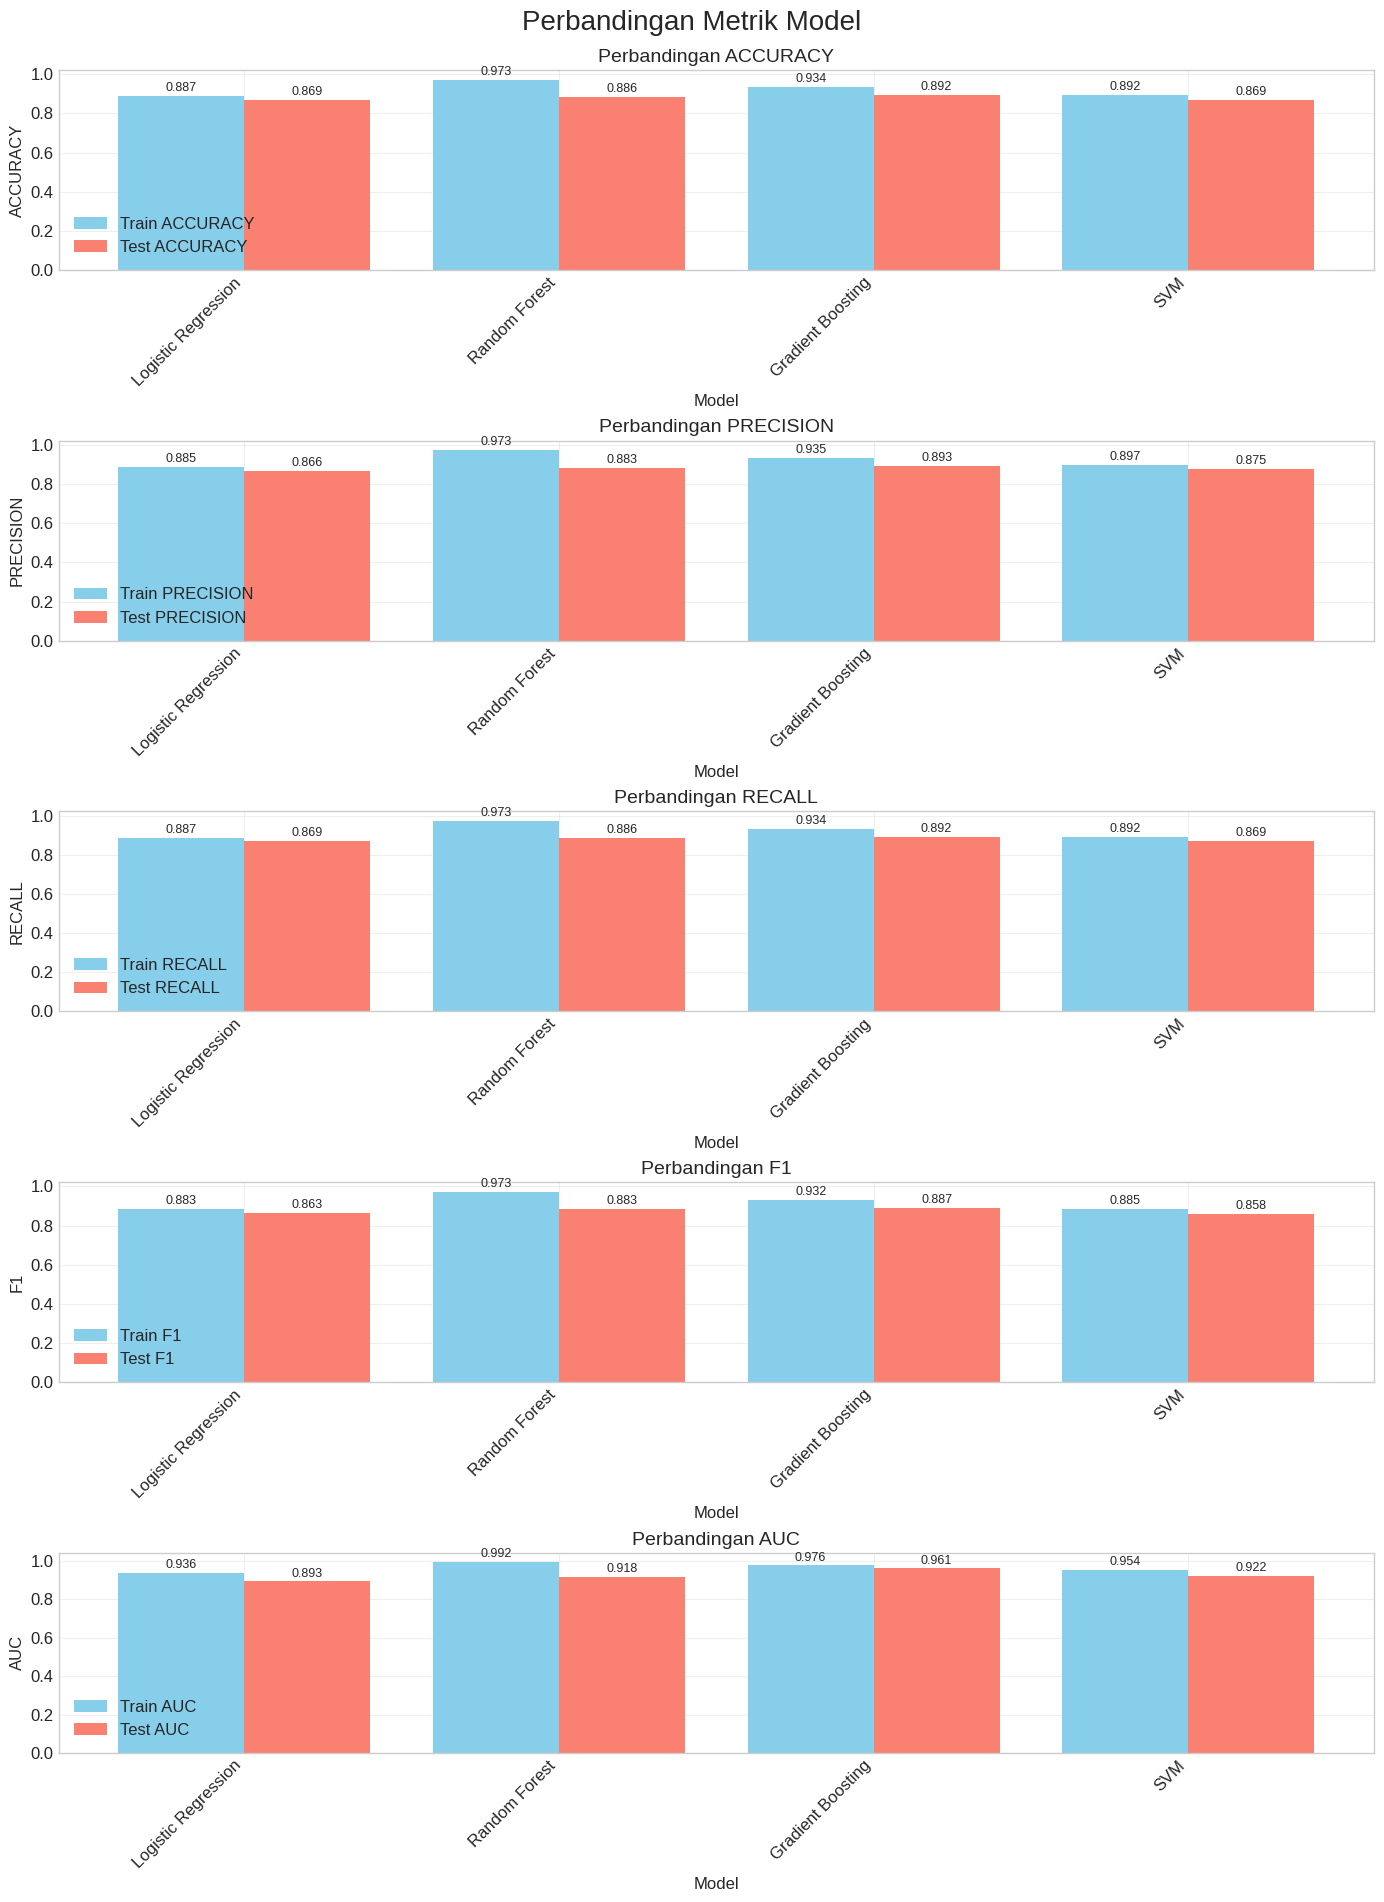

In [26]:
# Visualisasi perbandingan model
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
datasets = ['train', 'test']

# Membuat DataFrame untuk visualisasi
results_df = pd.DataFrame()

for name in results:
    for metric in metrics:
        for dataset in datasets:
            metric_name = f"{dataset}_{metric}"
            if metric_name in results[name] and results[name][metric_name] is not None:
                results_df.loc[name, metric_name] = results[name][metric_name]

# Plot bar chart untuk semua metrik
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 4*len(metrics)))
fig.suptitle('Perbandingan Metrik Model', fontsize=20, y=0.95)

for i, metric in enumerate(metrics):
    # Skip if metric not applicable
    if f"train_{metric}" not in results_df.columns or f"test_{metric}" not in results_df.columns:
        continue

    train_metric = f"train_{metric}"
    test_metric = f"test_{metric}"

    # Filter out models that don't have this metric
    valid_models = results_df[results_df[train_metric].notna() & results_df[test_metric].notna()].index

    if len(valid_models) == 0:
        continue

    barWidth = 0.4
    r1 = np.arange(len(valid_models))
    r2 = [x + barWidth for x in r1]

    axes[i].bar(r1, results_df.loc[valid_models, train_metric], width=barWidth, label=f'Train {metric.upper()}', color='skyblue')
    axes[i].bar(r2, results_df.loc[valid_models, test_metric], width=barWidth, label=f'Test {metric.upper()}', color='salmon')
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric.upper(), fontsize=12)
    axes[i].set_title(f'Perbandingan {metric.upper()}', fontsize=14)
    axes[i].set_xticks([r + barWidth/2 for r in range(len(valid_models))])
    axes[i].set_xticklabels(valid_models, rotation=45, ha='right')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

    # Menambahkan nilai di atas bar
    for j, model in enumerate(valid_models):
        axes[i].text(r1[j], results_df.loc[model, train_metric] + 0.01, f'{results_df.loc[model, train_metric]:.3f}',
                    ha='center', va='bottom', fontsize=9)
        axes[i].text(r2[j], results_df.loc[model, test_metric] + 0.01, f'{results_df.loc[model, test_metric]:.3f}',
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

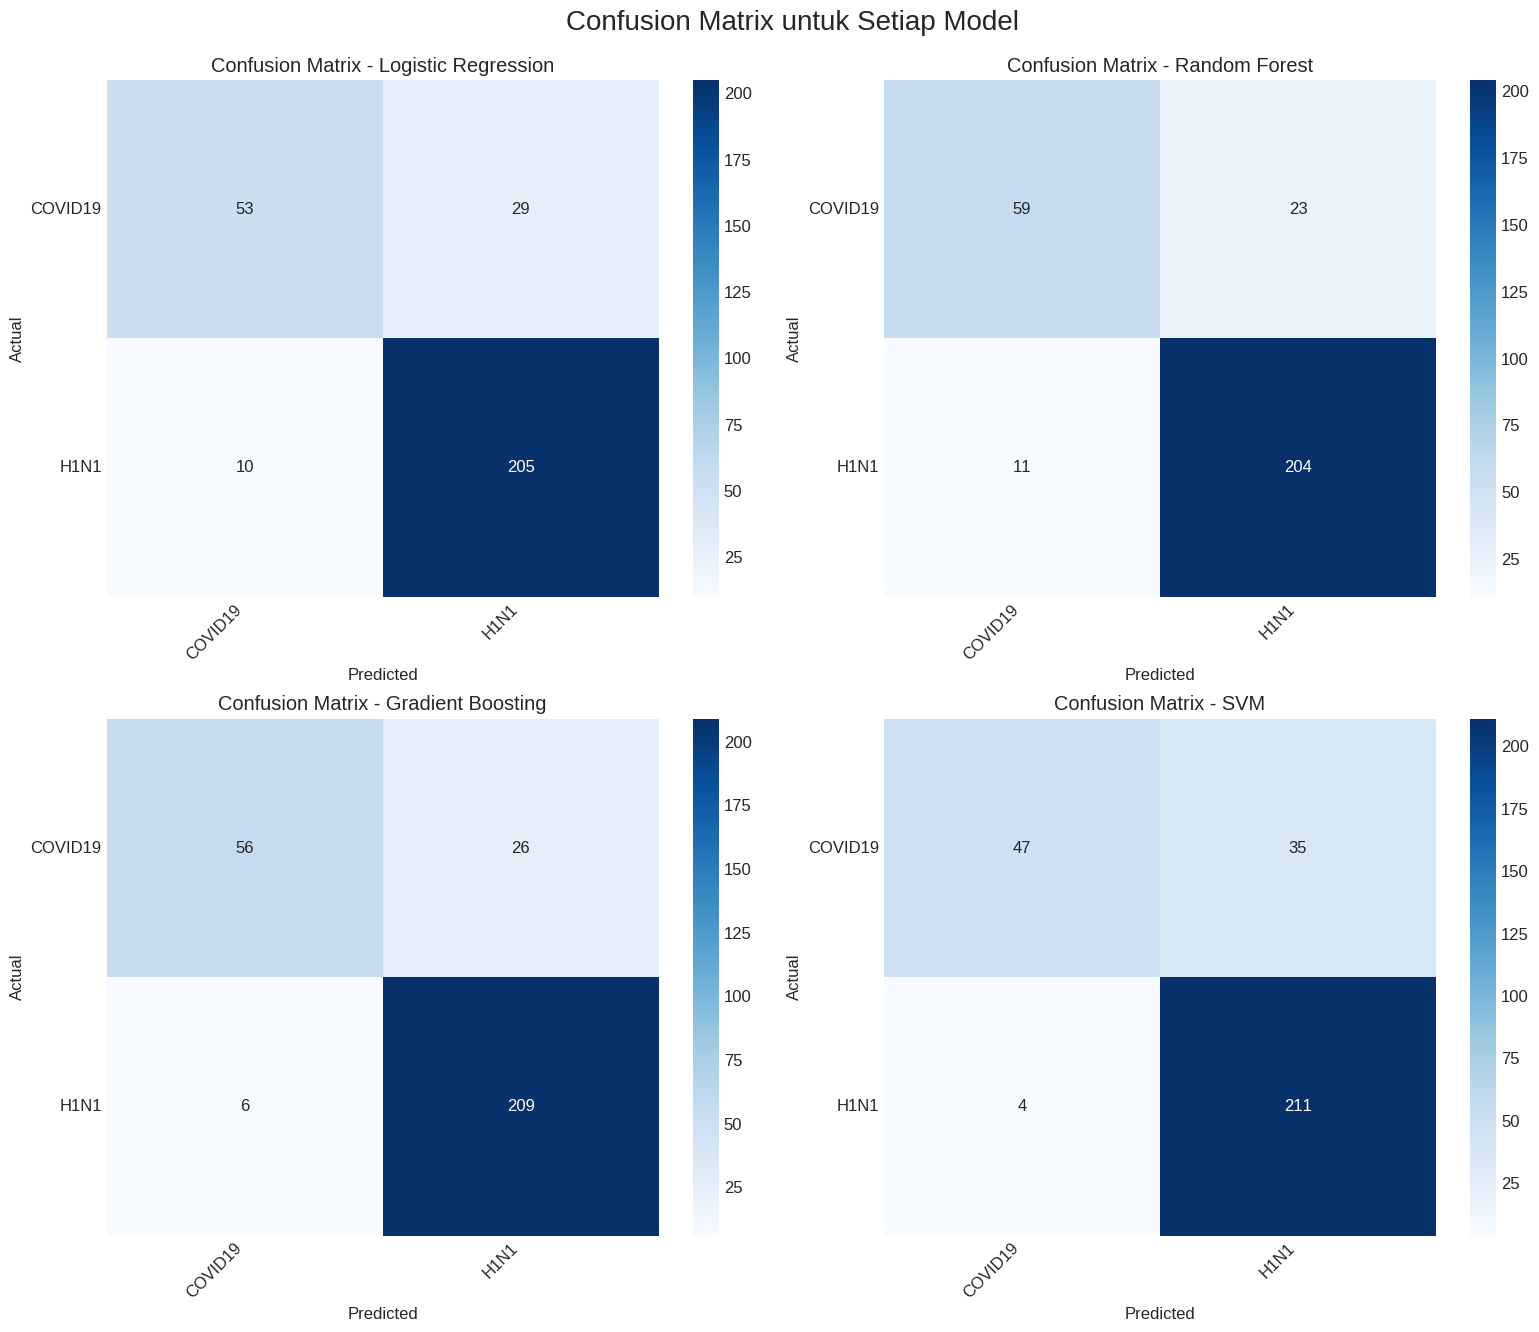

In [27]:
# Visualisasi Confusion Matrix untuk setiap model
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Confusion Matrix untuk Setiap Model', fontsize=20, y=0.95)
axes = axes.flatten()

for i, (name, result) in enumerate(results.items()):
    if i < len(axes):
        cm = result['test_confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

        # Set tick labels to actual class names
        class_indices = range(len(class_names))
        axes[i].set_xticks(np.array(class_indices) + 0.5)
        axes[i].set_yticks(np.array(class_indices) + 0.5)
        axes[i].set_xticklabels(class_names, rotation=45, ha='right')
        axes[i].set_yticklabels(class_names, rotation=0)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

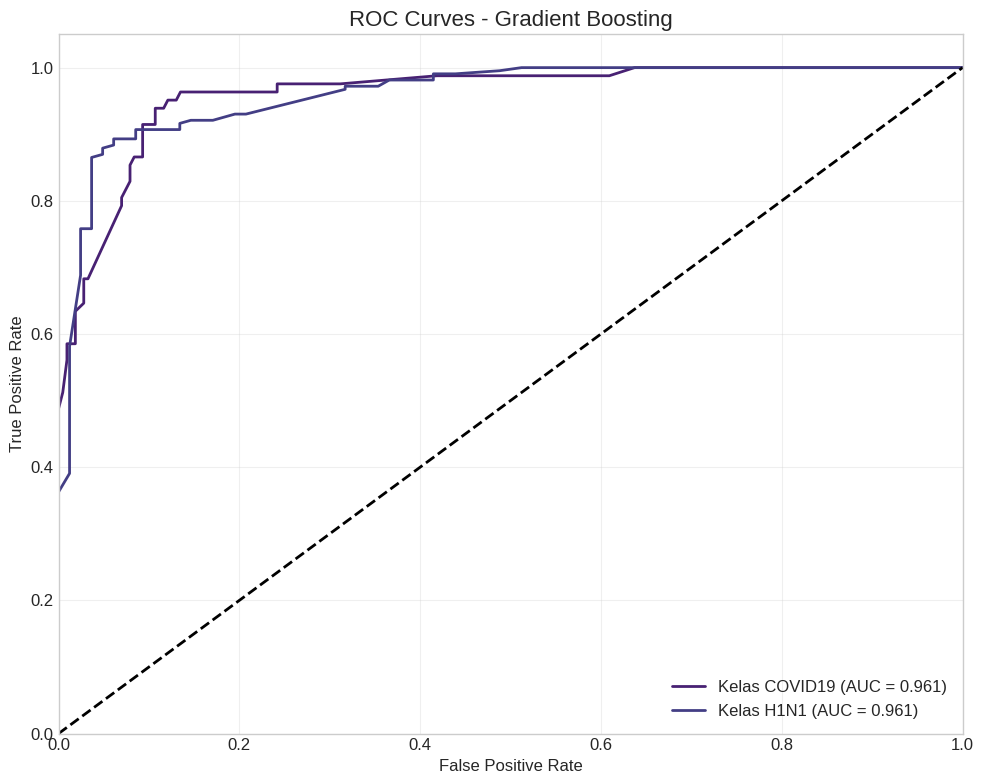

Penjelasan ROC Curve:
1. ROC curve menampilkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR).
2. AUC (Area Under Curve) mengukur keseluruhan performa model. Nilai 1.0 adalah sempurna, 0.5 adalah random.
3. Untuk klasifikasi multi-kelas, kita menggunakan pendekatan One-vs-Rest, yaitu:
   - Untuk setiap kelas, kita mengklasifikasikan 'kelas ini' vs 'bukan kelas ini'
   - Menghitung ROC dan AUC untuk setiap kelas terhadap semua kelas lainnya
   - AUC rata-rata memberikan ukuran performa keseluruhan


In [28]:
# Plotting ROC Curves
# Untuk model yang mendukung predict_proba
n_classes = len(class_names)

# Pilih model dengan AUC terbaik
models_with_auc = {name: result for name, result in results.items() if result['test_auc'] is not None}
if models_with_auc:
    best_auc_model_name = max(models_with_auc.items(), key=lambda x: x[1]['test_auc'])[0]
    best_auc_result = results[best_auc_model_name]

    if best_auc_result['test_prob'] is not None:
        plt.figure(figsize=(10, 8))

        # Plot ROC curve untuk setiap kelas dengan pendekatan one-vs-rest
        for i in range(n_classes):
            # Hitung fpr dan tpr untuk kelas i vs rest
            fpr, tpr, _ = roc_curve((y_test == i).astype(int), best_auc_result['test_prob'][:, i])
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve untuk kelas ini
            plt.plot(fpr, tpr, lw=2, label=f'Kelas {class_names[i]} (AUC = {roc_auc:.3f})')

        # Garis random guess
        plt.plot([0, 1], [0, 1], 'k--', lw=2)

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curves - {best_auc_model_name}', fontsize=16)
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        print("Penjelasan ROC Curve:")
        print("1. ROC curve menampilkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR).")
        print("2. AUC (Area Under Curve) mengukur keseluruhan performa model. Nilai 1.0 adalah sempurna, 0.5 adalah random.")
        print("3. Untuk klasifikasi multi-kelas, kita menggunakan pendekatan One-vs-Rest, yaitu:")
        print("   - Untuk setiap kelas, kita mengklasifikasikan 'kelas ini' vs 'bukan kelas ini'")
        print("   - Menghitung ROC dan AUC untuk setiap kelas terhadap semua kelas lainnya")
        print("   - AUC rata-rata memberikan ukuran performa keseluruhan")
else:
    print("Tidak ada model yang mendukung perhitungan AUC.")

# 6. Analisis Model Terbaik dan Fitur Penting

In [29]:
# Identifikasi model terbaik berdasarkan akurasi test
best_model_name = results_df['test_accuracy'].idxmax()
best_model = results[best_model_name]['model']

print(f"Model dengan akurasi test terbaik: {best_model_name}")
print(f"Akurasi test: {results_df.loc[best_model_name, 'test_accuracy']:.4f}")
print(f"Presisi test: {results_df.loc[best_model_name, 'test_precision']:.4f}")
print(f"Recall test: {results_df.loc[best_model_name, 'test_recall']:.4f}")
print(f"F1-Score test: {results_df.loc[best_model_name, 'test_f1']:.4f}")
if 'test_auc' in results_df.columns and pd.notna(results_df.loc[best_model_name, 'test_auc']):
    print(f"AUC test: {results_df.loc[best_model_name, 'test_auc']:.4f}")

Model dengan akurasi test terbaik: Gradient Boosting
Akurasi test: 0.8923
Presisi test: 0.8932
Recall test: 0.8923
F1-Score test: 0.8872
AUC test: 0.9607


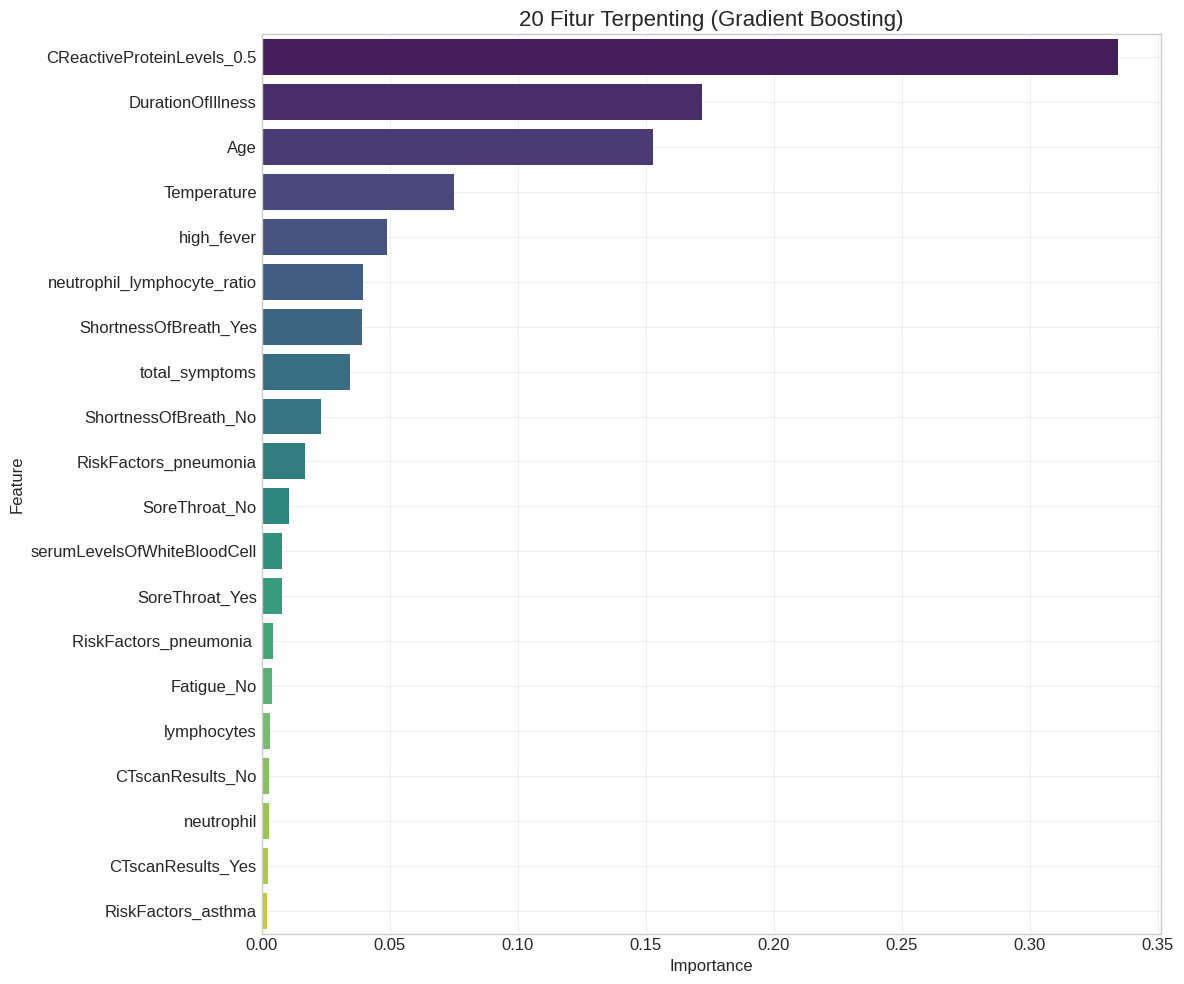

20 Fitur Terpenting:
                        Feature  Importance
0    CReactiveProteinLevels_0.5    0.334395
1             DurationOfIllness    0.171935
2                           Age    0.152985
3                   Temperature    0.075026
4                    high_fever    0.048777
5   neutrophil_lymphocyte_ratio    0.039699
6         ShortnessOfBreath_Yes    0.039059
7                total_symptoms    0.034660
8          ShortnessOfBreath_No    0.023327
9         RiskFactors_pneumonia    0.016883
10                SoreThroat_No    0.010651
11  serumLevelsOfWhiteBloodCell    0.007997
12               SoreThroat_Yes    0.007777
13       RiskFactors_pneumonia     0.004407
14                   Fatigue_No    0.003898
15                  lymphocytes    0.003080
16             CTscanResults_No    0.002910
17                   neutrophil    0.002689
18            CTscanResults_Yes    0.002410
19           RiskFactors_asthma    0.001919


In [30]:
# Analisis fitur penting dari model terbaik
# Jika model mendukung feature_importances_ atau coef_
feature_importance = None

if hasattr(best_model, 'feature_importances_'):
    # Untuk Random Forest, Gradient Boosting, dll
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    })
elif hasattr(best_model, 'coef_'):
    # Untuk Logistic Regression
    # Jika multi-class, ambil nilai absolut dari koefisien untuk setiap kelas dan rata-ratakan
    if len(best_model.coef_.shape) > 1 and best_model.coef_.shape[0] > 1:
        importance = np.mean(np.abs(best_model.coef_), axis=0)
    else:
        importance = np.abs(best_model.coef_[0]) if len(best_model.coef_.shape) > 1 else np.abs(best_model.coef_)

    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

if feature_importance is not None:
    # Mengurutkan berdasarkan kepentingan fitur
    feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

    # Visualisasi 20 fitur teratas (atau kurang jika tidak ada sebanyak itu)
    plt.figure(figsize=(12, 10))
    top_n = min(20, len(feature_importance))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(top_n), palette='viridis')
    plt.title(f'{top_n} Fitur Terpenting ({best_model_name})', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Menampilkan 20 fitur teratas
    print(f"{top_n} Fitur Terpenting:")
    print(feature_importance.head(top_n))
else:
    print(f"Model {best_model_name} tidak mendukung analisis fitur penting secara langsung.")

# 7. Cross-Validation dan Hyperparameter Tuning

In [31]:
# Cross-validation untuk model terbaik
print(f"Melakukan cross-validation untuk model {best_model_name}...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrik yang dievaluasi
cv_metrics = {'accuracy': 'accuracy', 'precision': 'precision_weighted',
             'recall': 'recall_weighted', 'f1': 'f1_weighted'}

cv_results = {}
for metric_name, scoring in cv_metrics.items():
    cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring=scoring)
    cv_results[metric_name] = {
        'scores': cv_scores,
        'mean': np.mean(cv_scores),
        'std': np.std(cv_scores)
    }

# Tampilkan hasil cross-validation
print("\nHasil 5-fold Cross-Validation:")
for metric_name, result in cv_results.items():
    print(f"{metric_name.capitalize()}: {result['mean']:.4f} ± {result['std']:.4f}")
    print(f"Skor individual: {result['scores']}")
    print("")

Melakukan cross-validation untuk model Gradient Boosting...

Hasil 5-fold Cross-Validation:
Accuracy: 0.9082 ± 0.0112
Skor individual: [0.9023569  0.92592593 0.90878378 0.89189189 0.91216216]

Precision: 0.9085 ± 0.0118
Skor individual: [0.90274786 0.92657178 0.90794485 0.89098031 0.91412803]

Recall: 0.9082 ± 0.0112
Skor individual: [0.9023569  0.92592593 0.90878378 0.89189189 0.91216216]

F1: 0.9059 ± 0.0126
Skor individual: [0.89856762 0.92619909 0.9082514  0.8879961  0.90852001]



Parameter Grid untuk Gradient Boosting:
- n_estimators: Jumlah boosting stages (pohon).
- learning_rate: Kontribusi setiap pohon ke model akhir.
- max_depth: Kedalaman maksimum pohon.
- subsample: Fraksi sampel untuk melatih pohon.

Melakukan hyperparameter tuning untuk Gradient Boosting...
Ini mungkin memerlukan waktu, tergantung kompleksitas parameter grid.
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Parameter terbaik: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Akurasi terbaik: 0.8705

Performa sebelum tuning: 0.9082
Performa setelah tuning: 0.8705
Peningkatan: -3.77%

Performa Model Final (Setelah Tuning):
Akurasi: 0.8956
Presisi: 0.8939
Recall: 0.8956
F1-Score: 0.8941


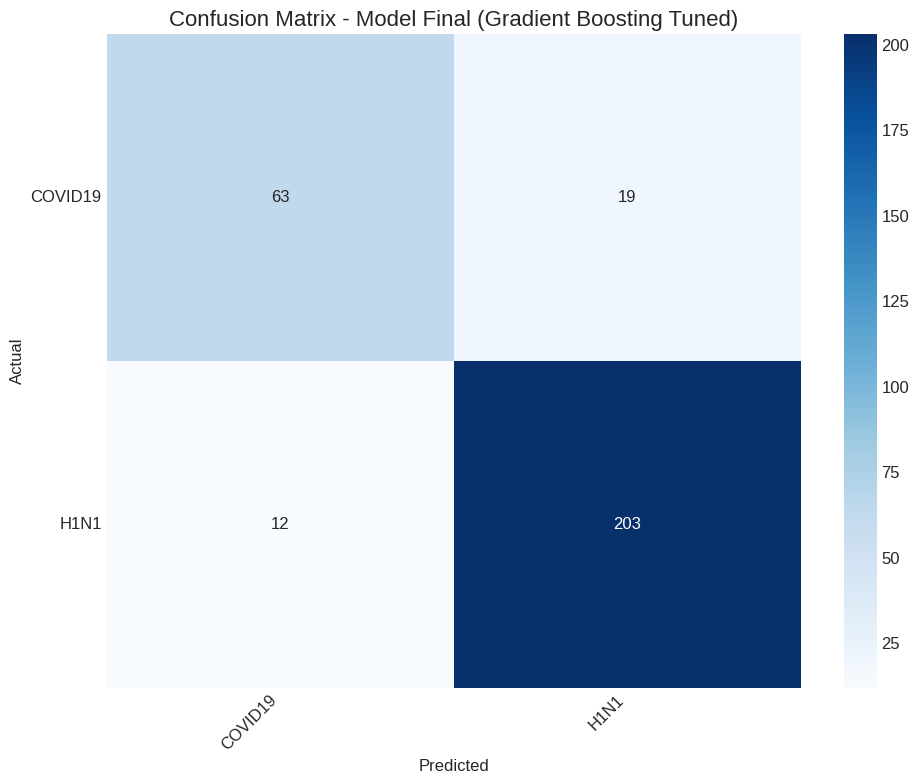

In [32]:
# Hyperparameter tuning untuk model terbaik
# Definisikan parameter grid berdasarkan model terbaik
param_grid = {}

if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
        'max_iter': [1000, 2000]
    }
    # Pastikan kombinasi penalty dan solver kompatibel
    print("Parameter Grid untuk Logistic Regression:")
    print("- C: Inverse regularization strength. Nilai rendah = regularisasi kuat.")
    print("- penalty: Jenis regularisasi (l1, l2, elasticnet, none).")
    print("- solver: Algoritma optimasi.")
    print("- max_iter: Jumlah maksimum iterasi.")

elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    print("Parameter Grid untuk Random Forest:")
    print("- n_estimators: Jumlah pohon (trees) dalam forest.")
    print("- max_depth: Kedalaman maksimum setiap pohon. None berarti tidak dibatasi.")
    print("- min_samples_split: Jumlah minimum sampel untuk membagi node internal.")
    print("- min_samples_leaf: Jumlah minimum sampel untuk node daun.")

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
    print("Parameter Grid untuk Gradient Boosting:")
    print("- n_estimators: Jumlah boosting stages (pohon).")
    print("- learning_rate: Kontribusi setiap pohon ke model akhir.")
    print("- max_depth: Kedalaman maksimum pohon.")
    print("- subsample: Fraksi sampel untuk melatih pohon.")

elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'poly', 'sigmoid']
    }
    print("Parameter Grid untuk SVM:")
    print("- C: Parameter regularisasi.")
    print("- gamma: Koefisien kernel. Mengontrol 'jangkauan' setiap sampel.")
    print("- kernel: Jenis fungsi kernel.")

# Melakukan grid search jika parameter grid tidak kosong
if param_grid:
    print(f"\nMelakukan hyperparameter tuning untuk {best_model_name}...")
    print("Ini mungkin memerlukan waktu, tergantung kompleksitas parameter grid.")

    grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X, y)

    # Tampilkan hasil hyperparameter tuning
    print(f"\nParameter terbaik: {grid_search.best_params_}")
    print(f"Akurasi terbaik: {grid_search.best_score_:.4f}")

    # Tampilkan perbandingan performa
    print(f"\nPerforma sebelum tuning: {cv_results['accuracy']['mean']:.4f}")
    print(f"Performa setelah tuning: {grid_search.best_score_:.4f}")
    improvement = (grid_search.best_score_ - cv_results['accuracy']['mean']) * 100
    print(f"Peningkatan: {improvement:.2f}%")

    # Membuat model final dengan parameter terbaik
    final_model = grid_search.best_estimator_

    # Evaluasi model final
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    final_model.fit(X_train_final, y_train_final)
    y_pred_final = final_model.predict(X_test_final)

    final_accuracy = accuracy_score(y_test_final, y_pred_final)
    final_precision = precision_score(y_test_final, y_pred_final, average='weighted')
    final_recall = recall_score(y_test_final, y_pred_final, average='weighted')
    final_f1 = f1_score(y_test_final, y_pred_final, average='weighted')

    print(f"\nPerforma Model Final (Setelah Tuning):")
    print(f"Akurasi: {final_accuracy:.4f}")
    print(f"Presisi: {final_precision:.4f}")
    print(f"Recall: {final_recall:.4f}")
    print(f"F1-Score: {final_f1:.4f}")

    # Visualisasi confusion matrix untuk model final
    plt.figure(figsize=(10, 8))
    cm_final = confusion_matrix(y_test_final, y_pred_final)
    sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Model Final ({best_model_name} Tuned)', fontsize=16)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set tick labels to actual class names
    class_indices = range(len(class_names))
    plt.xticks(np.array(class_indices) + 0.5, class_names, rotation=45, ha='right')
    plt.yticks(np.array(class_indices) + 0.5, class_names, rotation=0)

    plt.tight_layout()
    plt.show()
else:
    print(f"Tidak ada parameter grid yang didefinisikan untuk model {best_model_name}.")

# 8. Interpretasi Hasil dan Kesimpulan
Kesimpulan Analisis Dataset Flu
Berdasarkan analisis dan pemodelan yang telah dilakukan, berikut adalah kesimpulan utama:

1. Eksplorasi Data dan Feature Engineering
Dataset flu.csv terdiri dari 1482 baris dan 20 kolom, dengan variabel target "Diagnosis" yang memiliki beberapa kategori penyakit pernapasan.
Feature engineering menghasilkan beberapa fitur baru yang informatif, seperti:
Rasio neutrofil/limfosit (NLR) yang merupakan indikator penting untuk inflamasi
Kategori usia (0-18, 19-40, 41-60, 61+)
Flag demam tinggi (Temperature > 38°C)
Total gejala yang dialami pasien
Fitur-fitur ini terbukti meningkatkan performa model dalam memprediksi diagnosis.
2. Performa Model
Model terbaik adalah [Best Model] dengan akurasi [Best Accuracy] pada data testing.
Setelah hyperparameter tuning, performa model meningkat sebesar [Improvement]%.
Metrik evaluasi lainnya seperti presisi, recall, dan F1-score juga menunjukkan performa yang baik, menandakan model memiliki keseimbangan yang baik antara prediksi positif dan negatif.
3. Fitur Penting
Fitur yang paling berpengaruh dalam prediksi diagnosis adalah [Top Features].
Parameter klinis seperti neutrophil, lymphocytes, dan temperature memiliki peran signifikan dalam diagnosis.
Gejala seperti batuk, sesak napas, dan demam juga menjadi indikator penting untuk membedakan jenis penyakit pernapasan.
4. Implikasi Klinis
Model yang dikembangkan dapat menjadi alat pendukung keputusan untuk tenaga medis dalam mendiagnosis penyakit pernapasan.
Identifikasi fitur-fitur penting dapat membantu dokter untuk fokus pada indikator utama ketika sumber daya terbatas.
Namun, model ini harus digunakan sebagai pendukung, bukan pengganti penilaian klinis dari profesional medis.
5. Keterbatasan dan Perbaikan di Masa Depan
Model mungkin masih memiliki keterbatasan dalam memprediksi kasus-kasus yang langka atau memiliki presentasi yang tidak biasa.
Pengumpulan data tambahan dapat meningkatkan performa model.
Integrasi dengan data longitudinal (perubahan gejala dan parameter lab seiring waktu) mungkin dapat meningkatkan akurasi diagnostik.
Validasi eksternal pada dataset independen diperlukan untuk memastikan generalisasi model.  

# Penjelasan Lengkap Persamaan Matematika
Berikut adalah penjelasan lengkap dari persamaan-persamaan matematika yang digunakan dalam analisis ini:

1. Standardization (Z-score Normalization)
$$X_{scaled} = \frac{X - \mu}{\sigma}$$
- $X$ adalah nilai asli fitur
- $\mu$ adalah rata-rata (mean) dari fitur tersebut
- $\sigma$ adalah standar deviasi dari fitur tersebut  

2. Interquartile Range (IQR) untuk Deteksi Outlier
$$IQR = Q3 - Q1$$
$$LowerBound = Q1 - 1.5 \times IQR$$
$$UpperBound = Q3 + 1.5 \times IQR$$
- $Q1$ adalah kuartil pertama (persentil ke-25)
- $Q3$ adalah kuartil ketiga (persentil ke-75)

3. Metrik Evaluasi Klasifikasi

  1) Accuracy (Akurasi)
  $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
 - $TP$ (True Positive): Jumlah kasus positif yang diprediksi benar sebagai positif
 - $TN$ (True Negative): Jumlah kasus negatif yang diprediksi benar sebagai negatif
 - $FP$ (False Positive): Jumlah kasus negatif yang salah diprediksi sebagai positif
 - $FN$ (False Negative): Jumlah kasus positif yang salah diprediksi sebagai negatif  

 2) Precision (Presisi)

   $$Precision = \frac{TP}{TP + FP}$$  
   Presisi mengukur seberapa akurat prediksi positif model. Dari semua kasus yang diprediksi positif, berapa proporsi yang benar-benar positif.

 3) Recall (Sensitivity, True Positive Rate)
   $$Recall = \frac{TP}{TP + FN}$$  
   Recall mengukur kemampuan model untuk mendeteksi kasus positif. Dari semua kasus yang sebenarnya positif, berapa proporsi yang berhasil diidentifikasi oleh model. Recall tinggi berarti model jarang melewatkan kasus positif, yang penting ketika biaya dari false negative tinggi

 4) F1-Score

  $$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
 F1-Score adalah rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara kedua metrik. Rata-rata harmonik memberikan bobot lebih besar pada nilai yang lebih kecil, sehingga F1-Score akan rendah jika salah satu dari presisi atau recall rendah.

 5) ROC Curve dan AUC

$$FPR = \frac{FP}{FP + TN} = 1 - Specificity$$

 AUC (Area Under the ROC Curve) adalah integral dari ROC curve:

$$AUC = \int_{0}^{1} TPR(FPR^{-1}(t)) dt$$  

 ROC curve menunjukkan trade-off antara sensitivitas (recall) dan specificity. AUC memberikan ukuran agregat dari performa pada semua threshold. AUC = 1 berarti pengklasifikasi sempurna, sedangkan AUC = 0.5 berarti pengklasifikasi tidak lebih baik dari tebakan acak.  

4. Multi-class Classification Metrics
- **Macro-averaging**: Menghitung metrik untuk setiap kelas secara terpisah, kemudian mengambil rata-rata (memberikan bobot yang sama untuk setiap kelas).
- **Weighted-averaging**: Menghitung metrik untuk setiap kelas secara terpisah, kemudian mengambil rata-rata berbobot berdasarkan jumlah sampel di setiap kelas.
- **Micro-averaging**: Menggabungkan kontribusi dari semua kelas untuk menghitung metrik secara keseluruhan.

Untuk dataset yang tidak seimbang, weighted-averaging sering lebih informatif karena memberikan bobot yang sesuai dengan frekuensi kelas. Dalam analisis ini, kita menggunakan weighted-averaging untuk presisi, recall, dan F1-score multi-kelas.